In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv("df.csv")

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df

Rating  Helpful                                             Review  \
0         1.0       19  accutane (isotretinoin):“i took this poison fo...   
1        10.0        6  myorisan (isotretinoin):“this is my sixth and ...   
2         2.0        9  accutane (isotretinoin):“there is no doubt thi...   
3        10.0        9  claravis (isotretinoin):“a month after finishi...   
4         3.0        9  accutane (isotretinoin):“i took this horrible ...   
...       ...      ...                                                ...   
58313    10.0      190  “i found xenical to work very well. true it di...   
58314    10.0      128  “i went to my doctor in april of 2000, my weig...   
58315    10.0      153  “xenical is great!! on 3 months i lost 30 poun...   
58316    10.0      111  “xenical made look skinnier than ever. i also ...   
58317     7.0       51  “xenical really helped me, but some of the bow...   

               Drug Condition      Month  Year  Review_length  \
0      isotretinoin      Acne  September  2020            566   
1      isotretinoin      Acne  September  2020            927   
2      isotretinoin      Acne     August  2020            725   
3      isotretinoin      Acne     August  2020            513   
4      isotretinoin      Acne     August  2020            195   
...             ...       ...        ...   ...            ...   
58313       xenical   Obesity  September  2008            621   
58314       xenical   Obesity        May  2008            453   
58315       xenical   Obesity   February  2008            176   
58316       xenical   Obesity   February  2008            289   
58317       xenical   Obesity   February  2008            117   

                                            review_clean  Rating_Binary  
0      accutane isotretinoin took poison 6 months com...              0  
1      myorisan isotretinoin sixth last month taking ...              1  
2      accutane isotretinoin doubt drug accutane work...              0  
3      claravis isotretinoin month finishing claravis...              1  
4      accutane isotretinoin took horrible drug 35 ye...              0  
...                                                  ...            ...  
58313  found xenical work well true side effects good...              1  
58314  went doctor april 2000 weight 218 lbs 5 ft 1 i...              1  
58315  xenical great 3 months lost 30 pounds never ga...              1  
58316  xenical made look skinnier ever also controlle...              1  
58317  xenical really helped bowel problems made marg...              1  

[58318 rows x 10 columns]

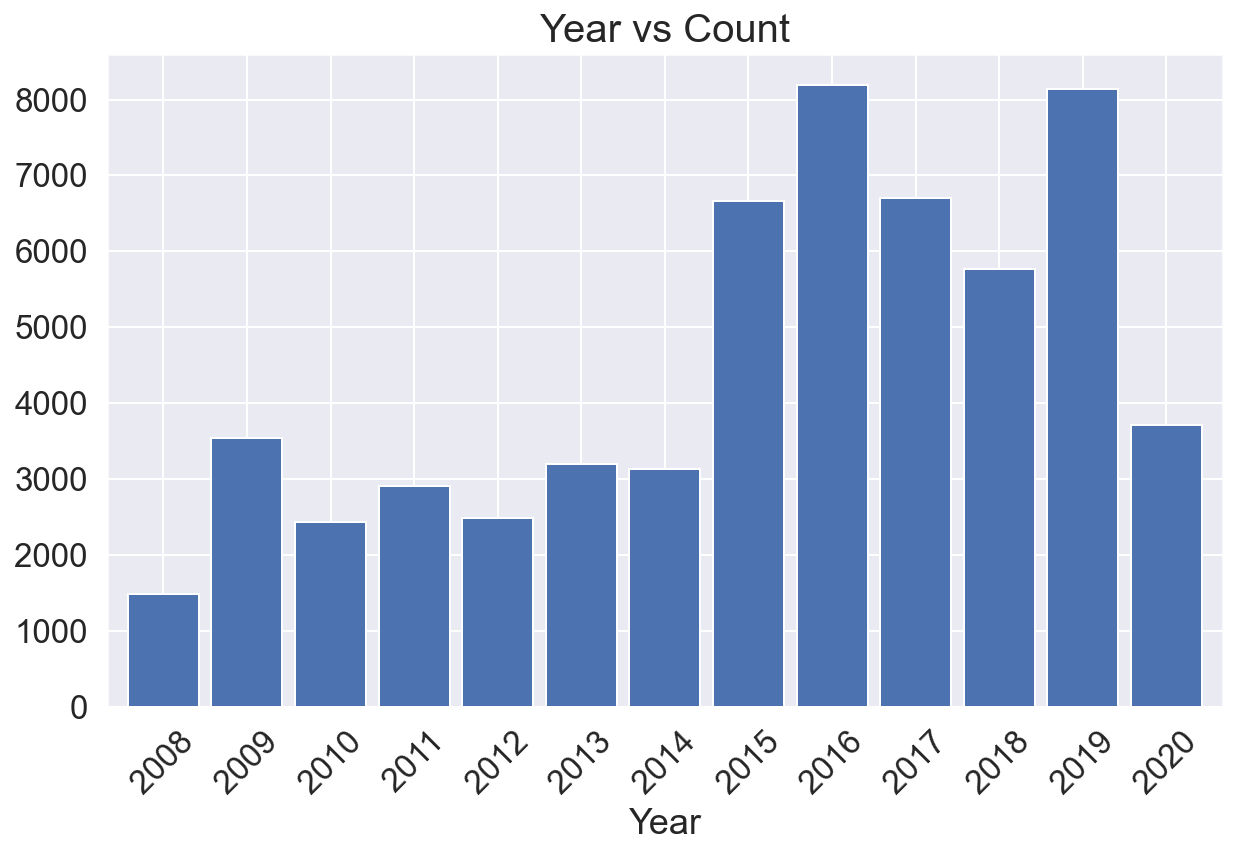

In [6]:
fig,ax = plt.subplots(figsize = (10,6))
df.groupby('Year').size().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=45)
ax.set_title('Year vs Count', fontsize=20)
plt.show()

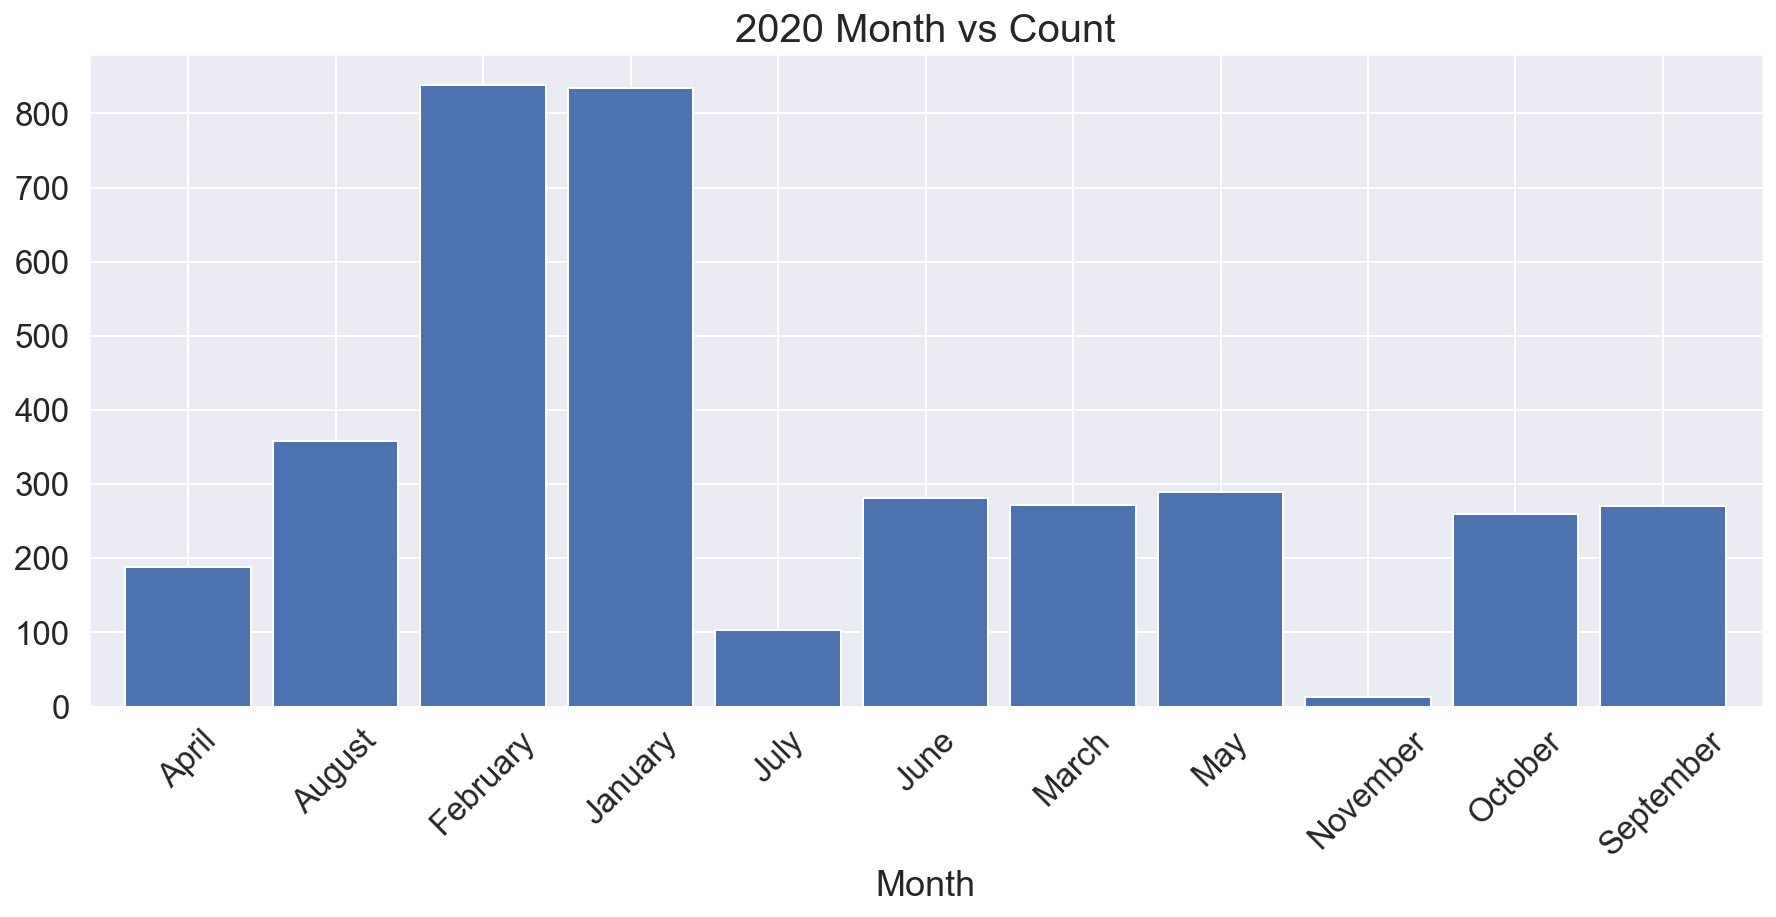

In [8]:
df_2020 = df.loc[df.Year == 2020]
fig,ax = plt.subplots(figsize = (15,6))
df_2020.groupby('Month').size().plot(kind='bar', color='b', width=0.85)
ax.set_title('2020 Month vs Count', fontsize=20)
plt.xticks(rotation=45)
plt.show()

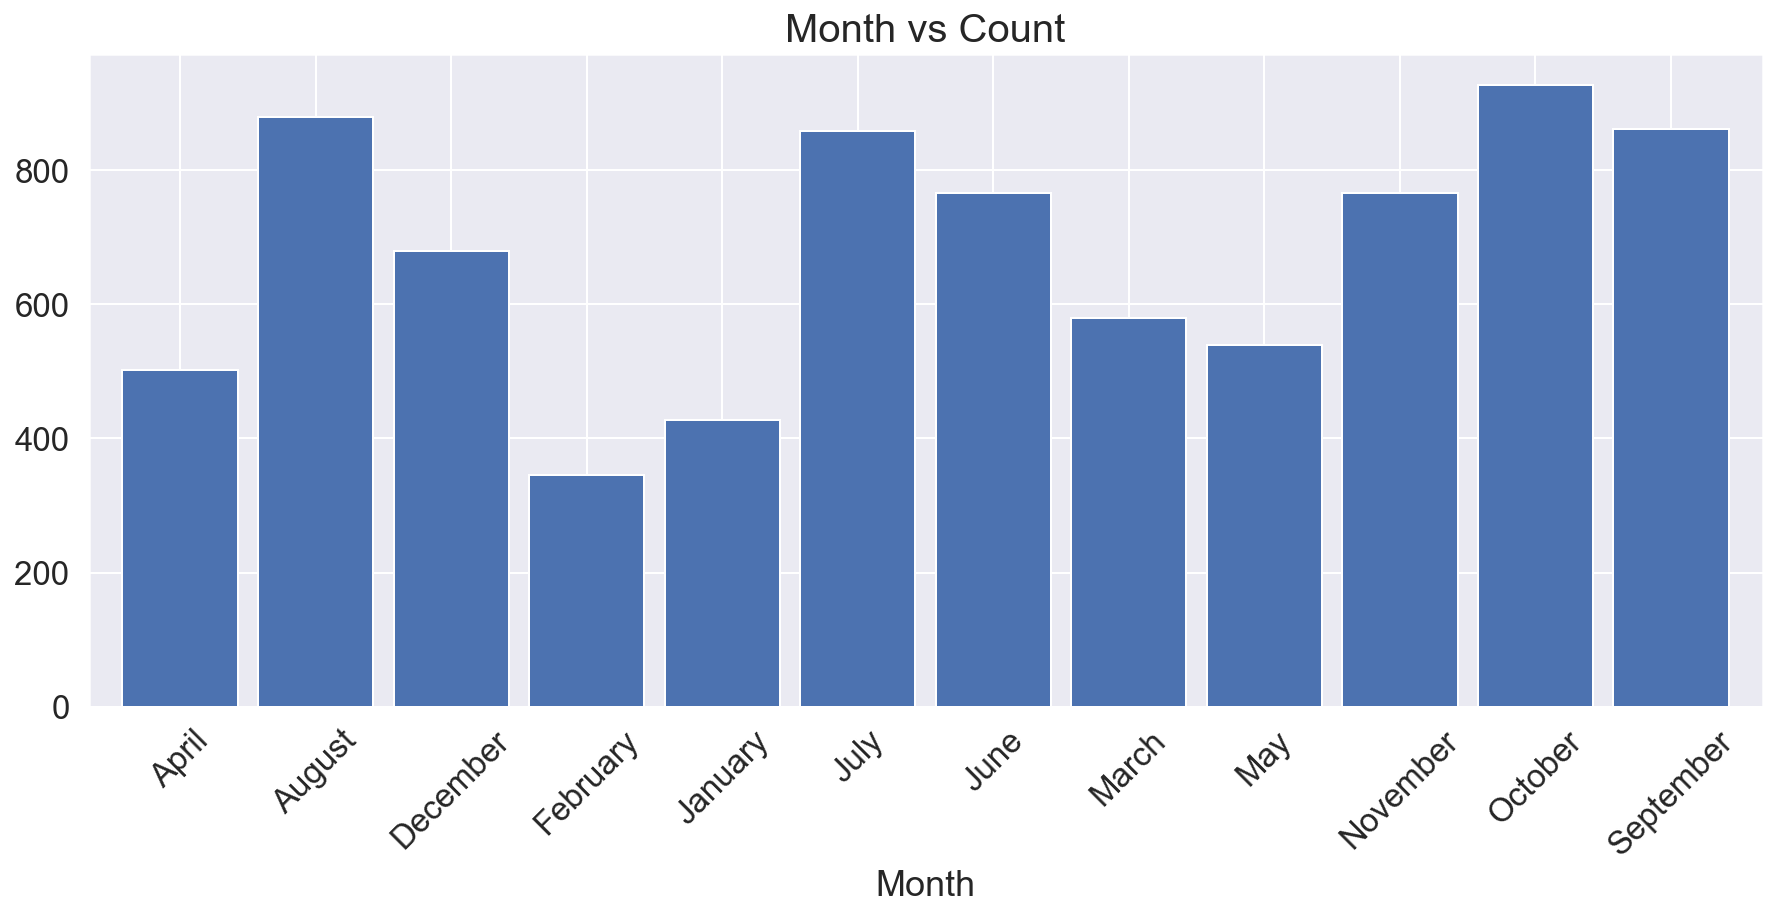

In [9]:
df_2019 = df.loc[df.Year == 2019]
fig,ax = plt.subplots(figsize = (15,6))
df_2019.groupby('Month').size().plot(kind='bar', color='b', width=0.85)
ax.set_title('Month vs Count', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [10]:
df = df.loc[df.Year != 2020]

In [11]:
df.reset_index(drop=True).head()

Rating  Helpful                                             Review  \
0     8.0        9  accutane (isotretinoin):“i would give this med...   
1     8.0       18  accutane (isotretinoin):“i started getting acn...   
2    10.0        2  “its amazing for big pimples\r\nits clear my f...   
3     9.0       16  accutane (isotretinoin):“previously i had a se...   
4     7.0       19  accutane (isotretinoin):“my back and abdomen a...   

           Drug Condition     Month  Year  Review_length  \
0  isotretinoin      Acne  December  2019            390   
1  isotretinoin      Acne  December  2019            951   
2  isotretinoin      Acne  December  2019             48   
3  isotretinoin      Acne  December  2019            995   
4  isotretinoin      Acne  December  2019           1008   

                                        review_clean  Rating_Binary  
0  accutane isotretinoin would give medicine 10/1...              1  
1  accutane isotretinoin started getting acne 13 ...              1  
2                     amazing big pimples clear face              1  
3  accutane isotretinoin previously serious acne ...              1  
4  accutane isotretinoin back abdomen acne became...              1

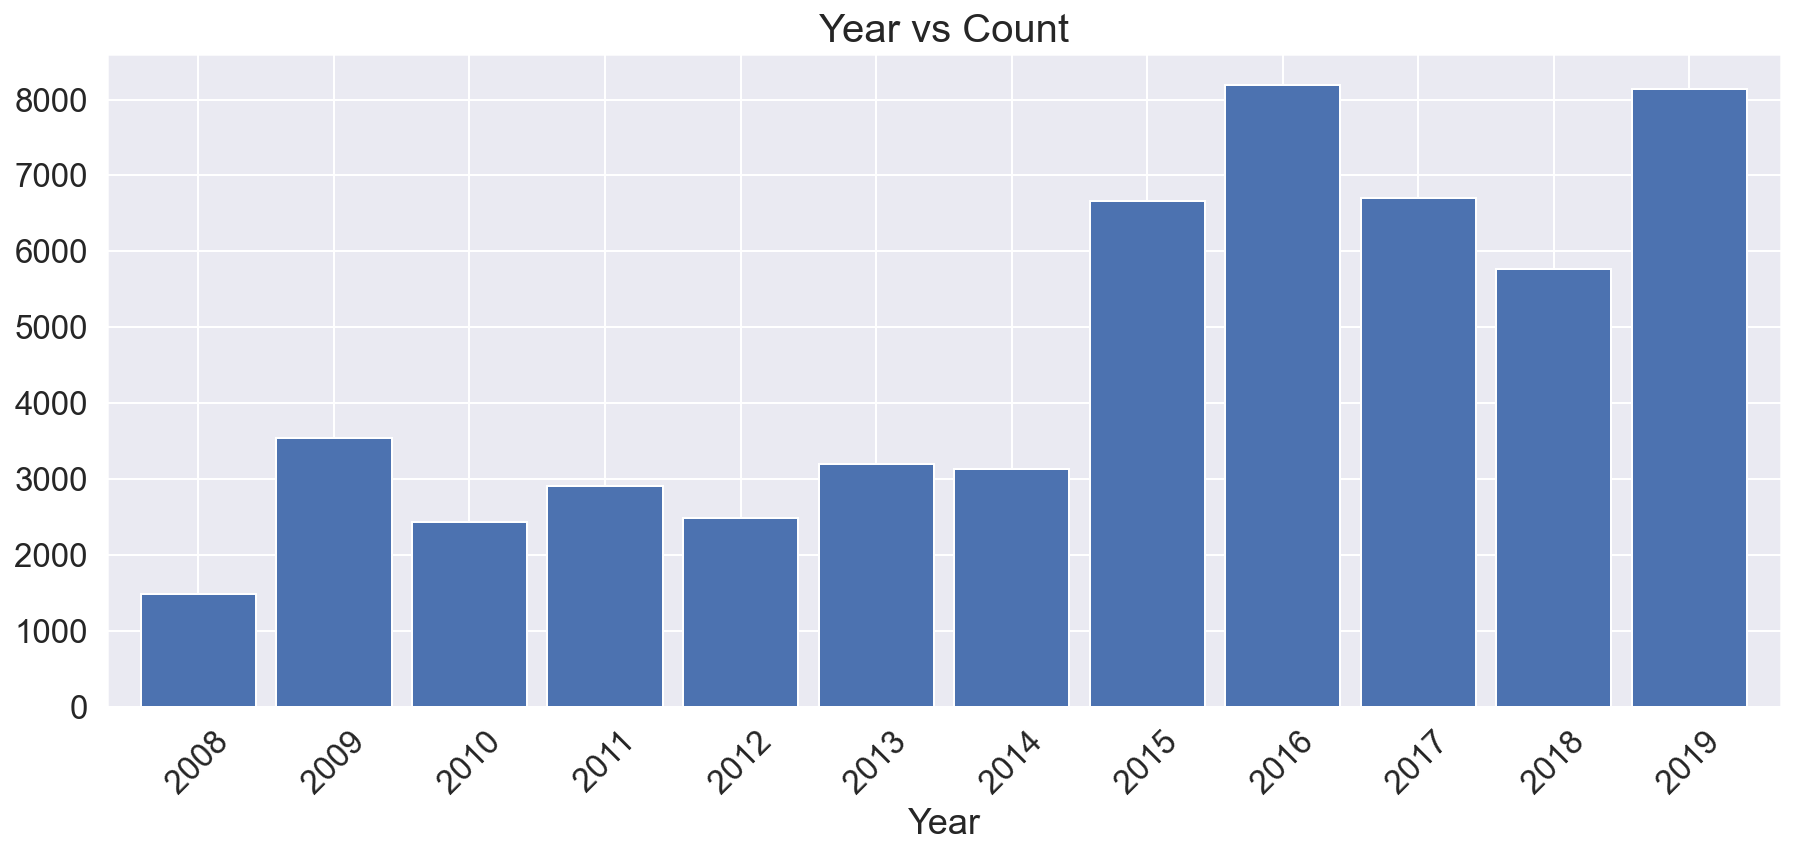

In [14]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby('Year').size().plot(kind='bar', color='b', width=0.85)
ax.set_title('Year vs Count', fontsize=20)
plt.xticks(rotation=45)
plt.show()

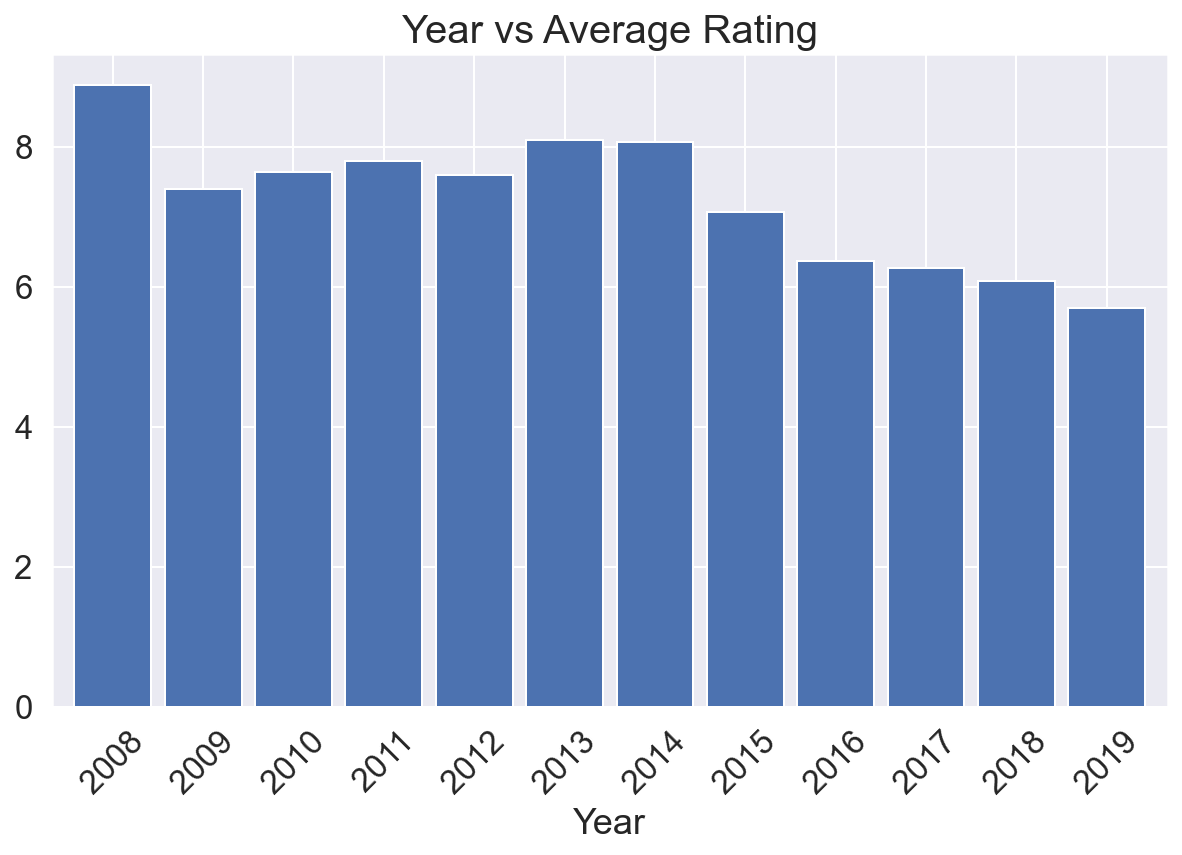

In [15]:
fig,ax = plt.subplots(figsize = (10,6))
df.groupby(['Year'])['Rating'].mean().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=45)
ax.set_title('Year vs Average Rating', fontsize=20)
plt.show()

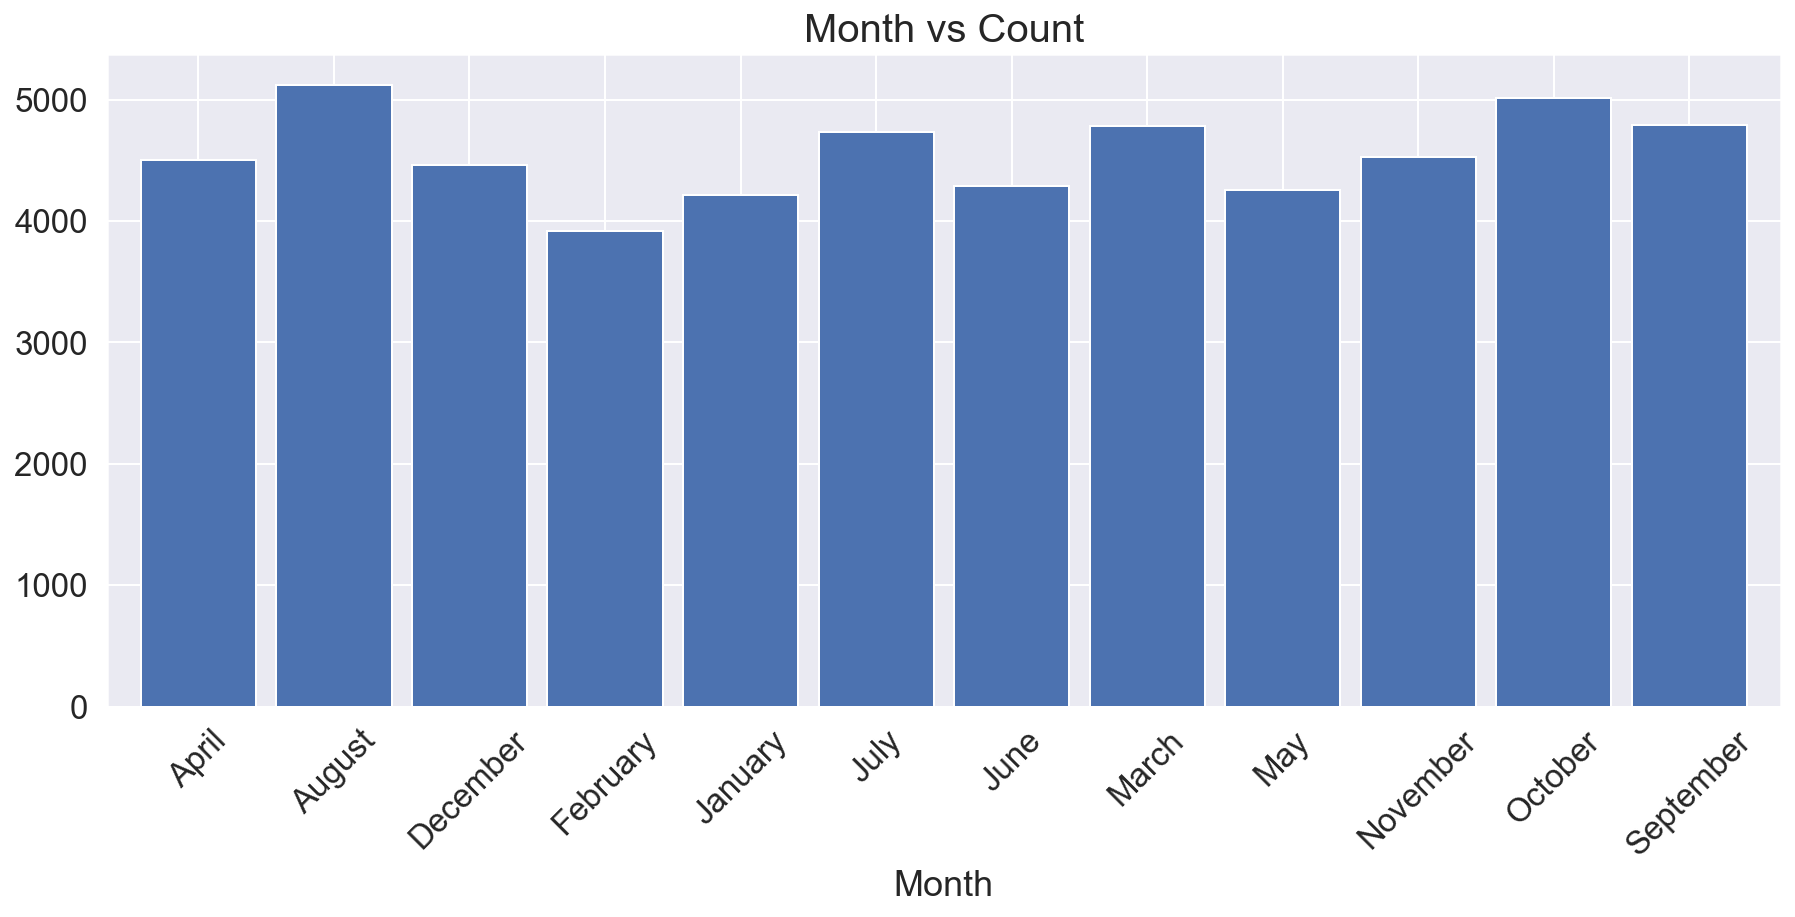

In [16]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby('Month').size().plot(kind='bar', color='b', width=0.85)
ax.set_title('Month vs Count', fontsize=20)
plt.xticks(rotation=45)
plt.show()

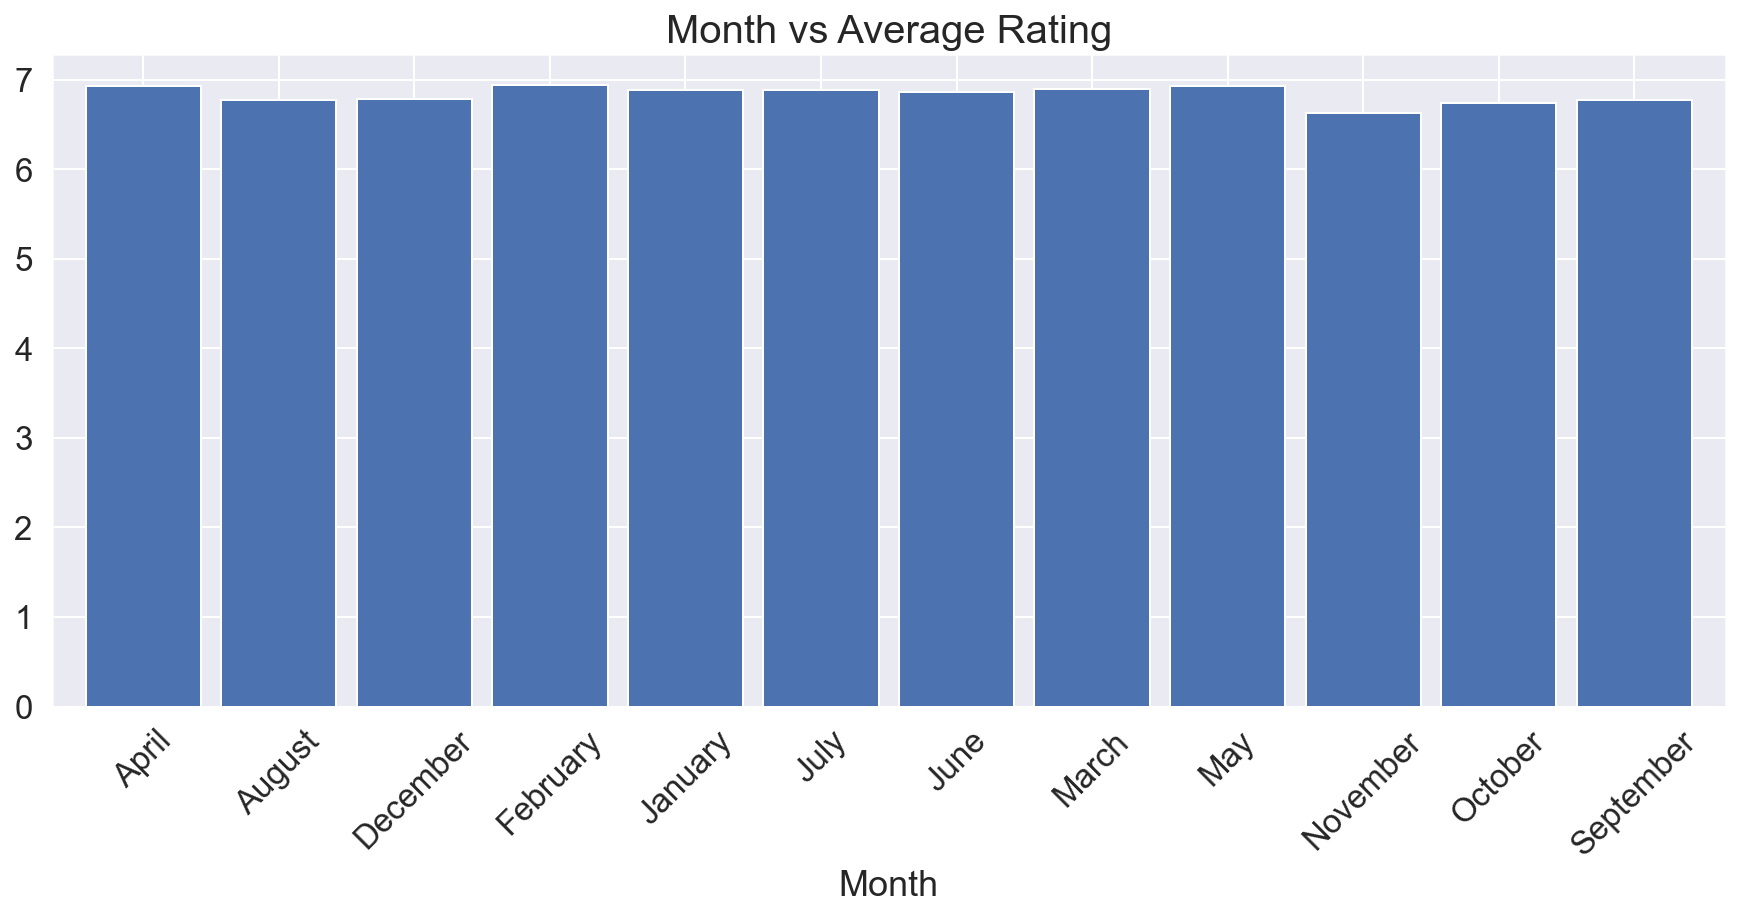

In [17]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby(['Month'])['Rating'].mean().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=45)
ax.set_title('Month vs Average Rating', fontsize=20)
plt.show()

bisacodyl                         239
belsomra                          222
ethinyl estradiol/norgestimate    221
dulcolax                          174
trulicity                         173
abreva                            172
venlafaxine                       171
buspirone                         167
hydroxyzine                       162
contrave                          135
Name: Drug, dtype: int64


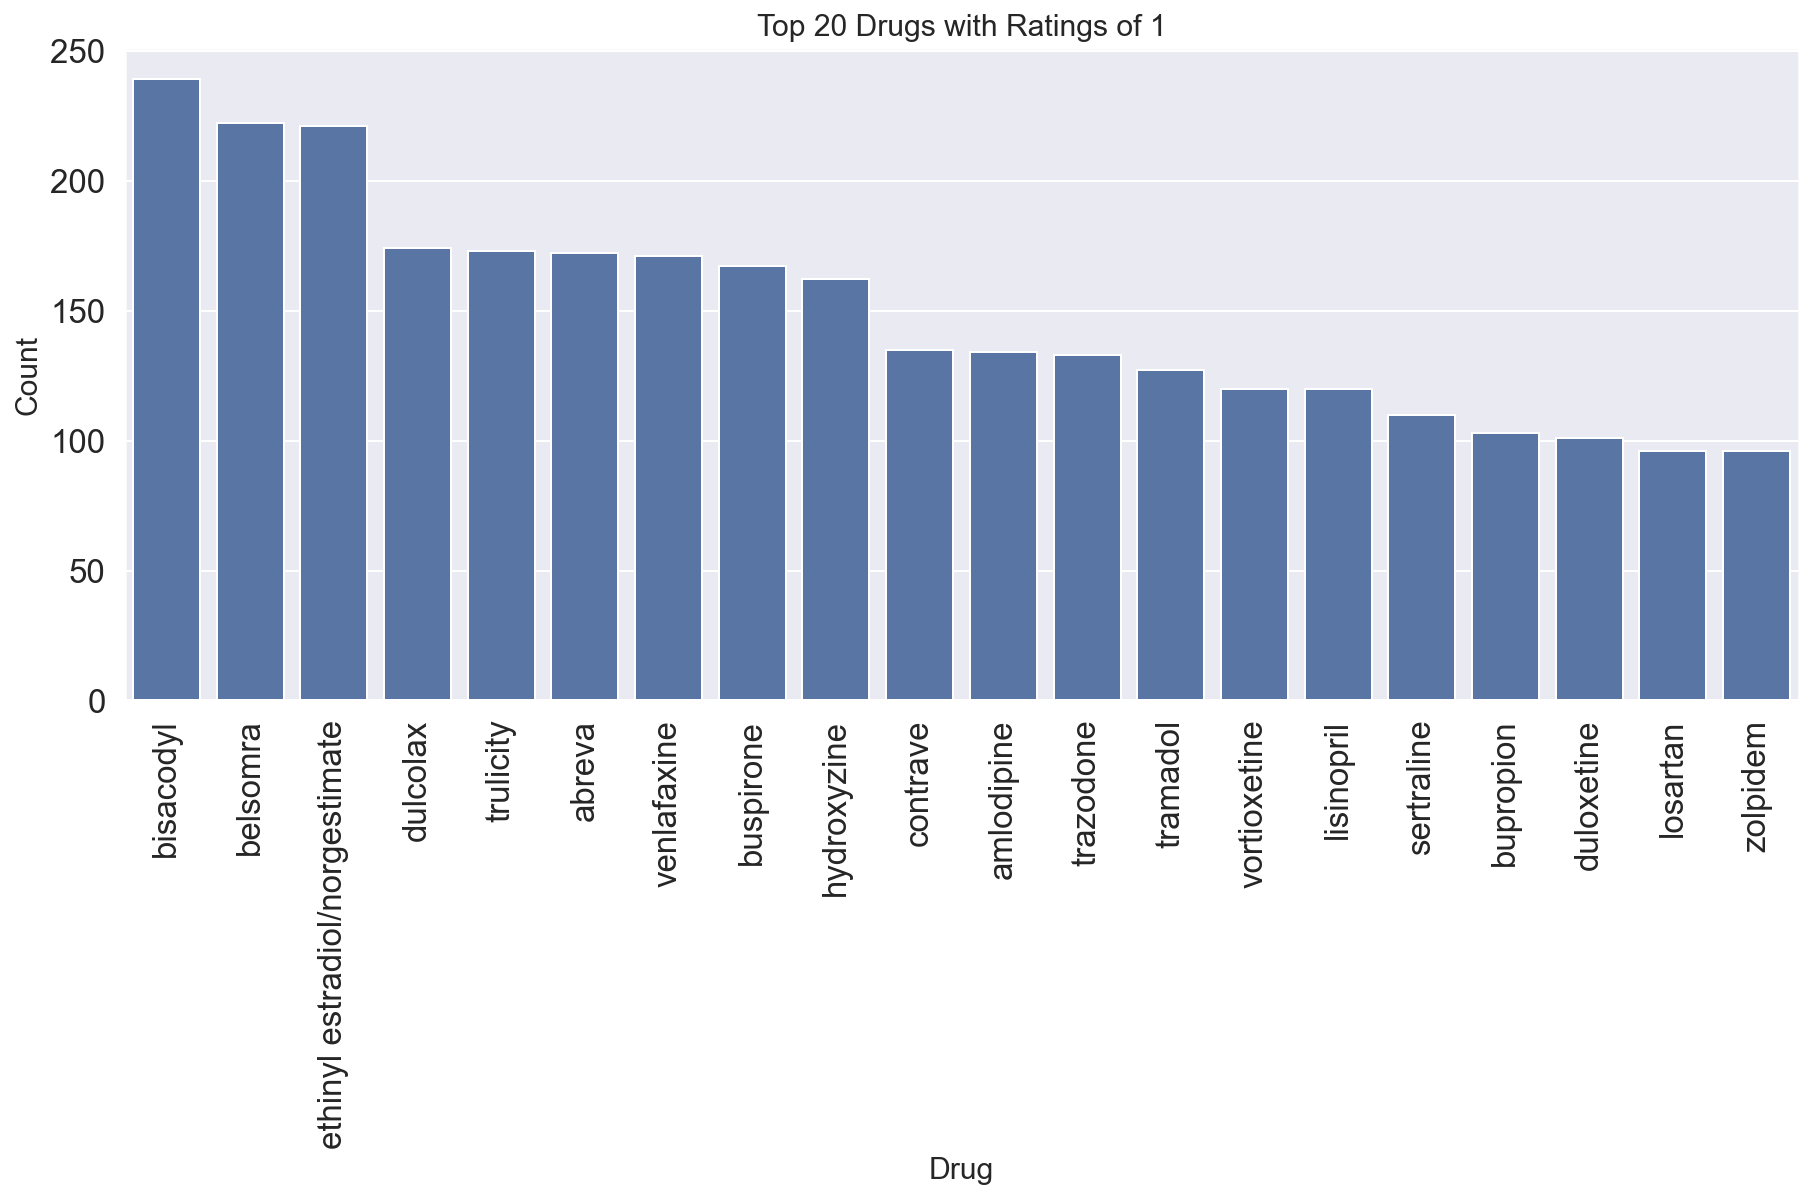

In [18]:
print(df.loc[df['Rating'] == 1, :]['Drug'].value_counts().head(10))
fig, ax = plt.subplots(figsize=(15,6))
rating = dict(df.loc[df.Rating == 1, 'Drug'].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

ax = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color='b')
ax.set_xticklabels(labels = drugname[0:20], rotation=90)
ax.set_title("Top 20 Drugs with Ratings of 1", fontsize=15)
ax.set_xlabel('Drug',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
plt.show()

ethinyl estradiol/norgestimate    412
alprazolam                        403
isotretinoin                      376
lamotrigine                       331
clonazepam                        308
contrave                          277
bupropion                         270
quetiapine                        269
xanax                             266
zolpidem                          249
Name: Drug, dtype: int64


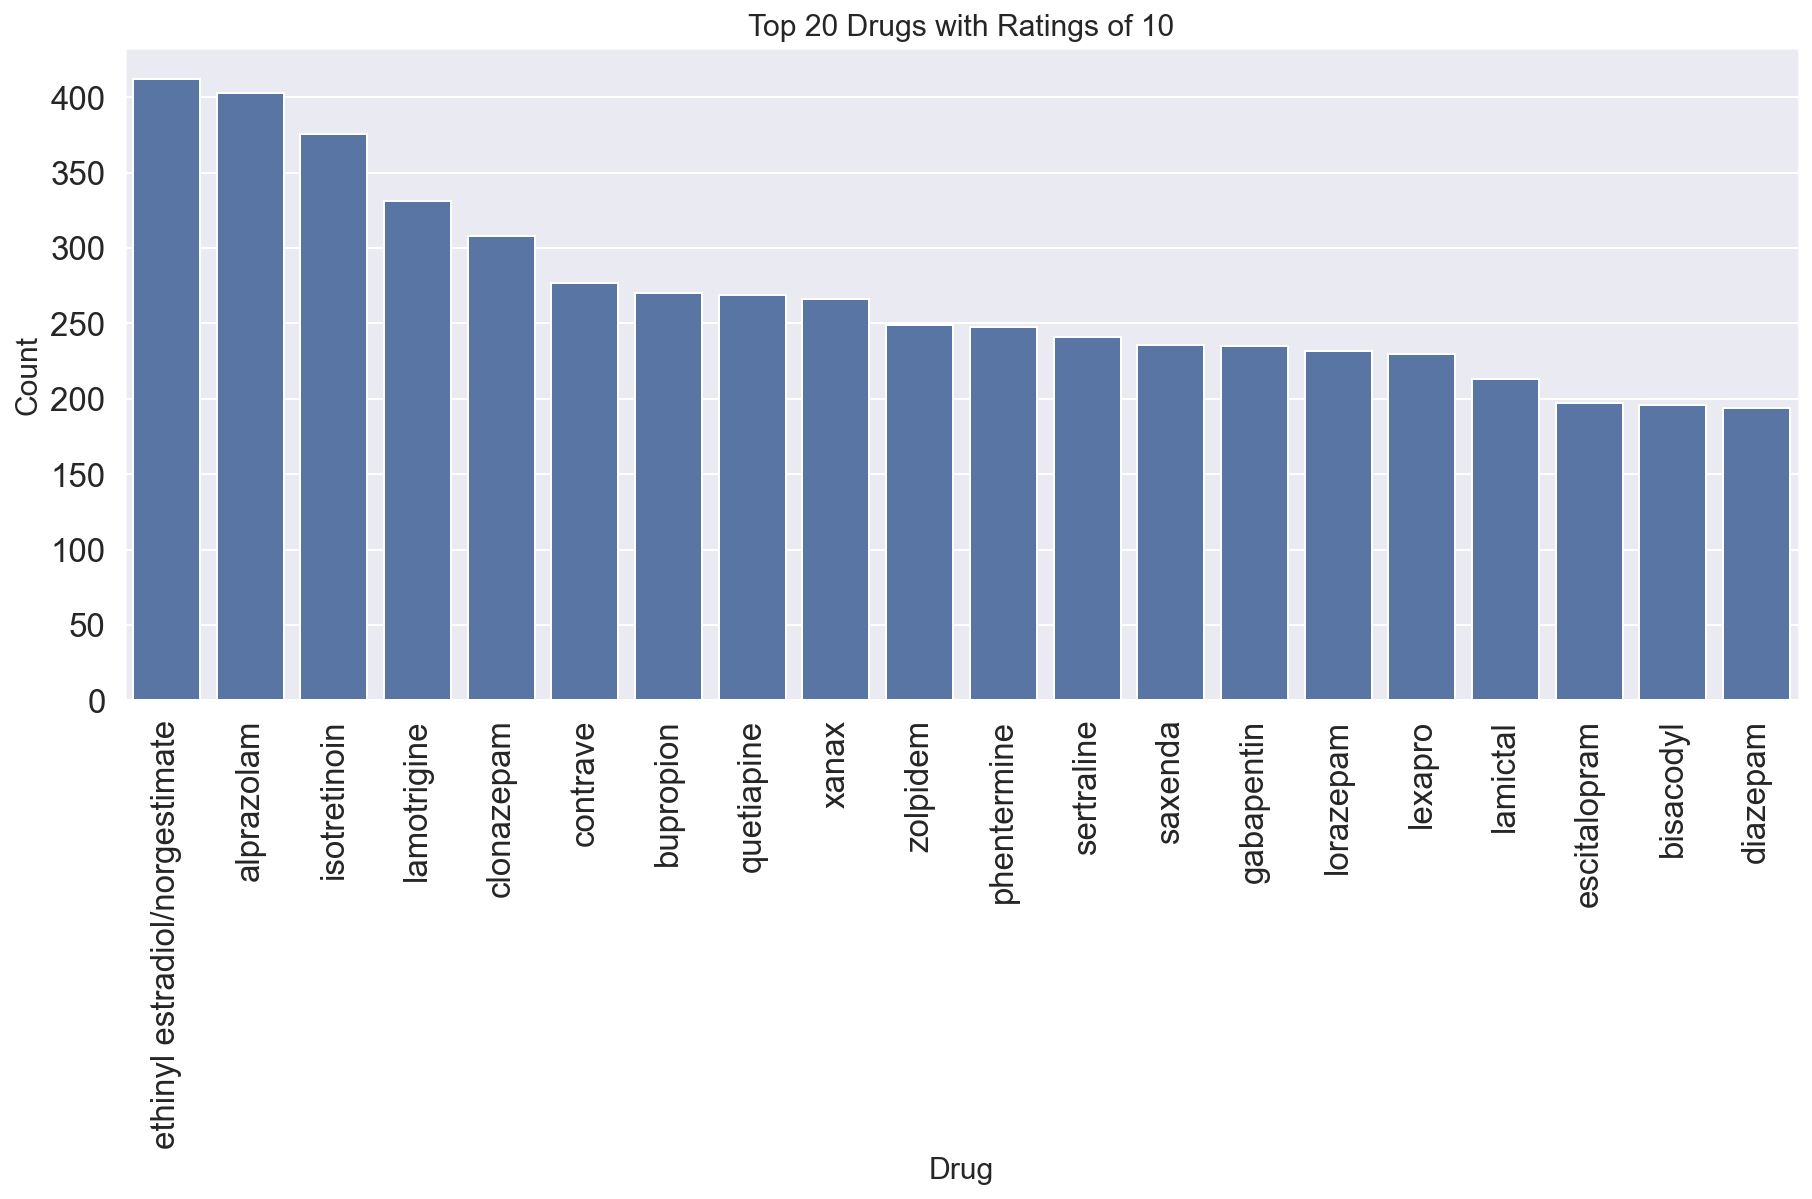

In [19]:
print(df.loc[df['Rating'] == 10, :]['Drug'].value_counts().head(10))
fig, ax = plt.subplots(figsize=(15,6))
rating = dict(df.loc[df.Rating == 10, 'Drug'].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

ax = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color='b')
ax.set_xticklabels(labels = drugname[0:20], rotation=90)
ax.set_title("Top 20 Drugs with Ratings of 10", fontsize=15)
ax.set_xlabel('Drug',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
plt.show()

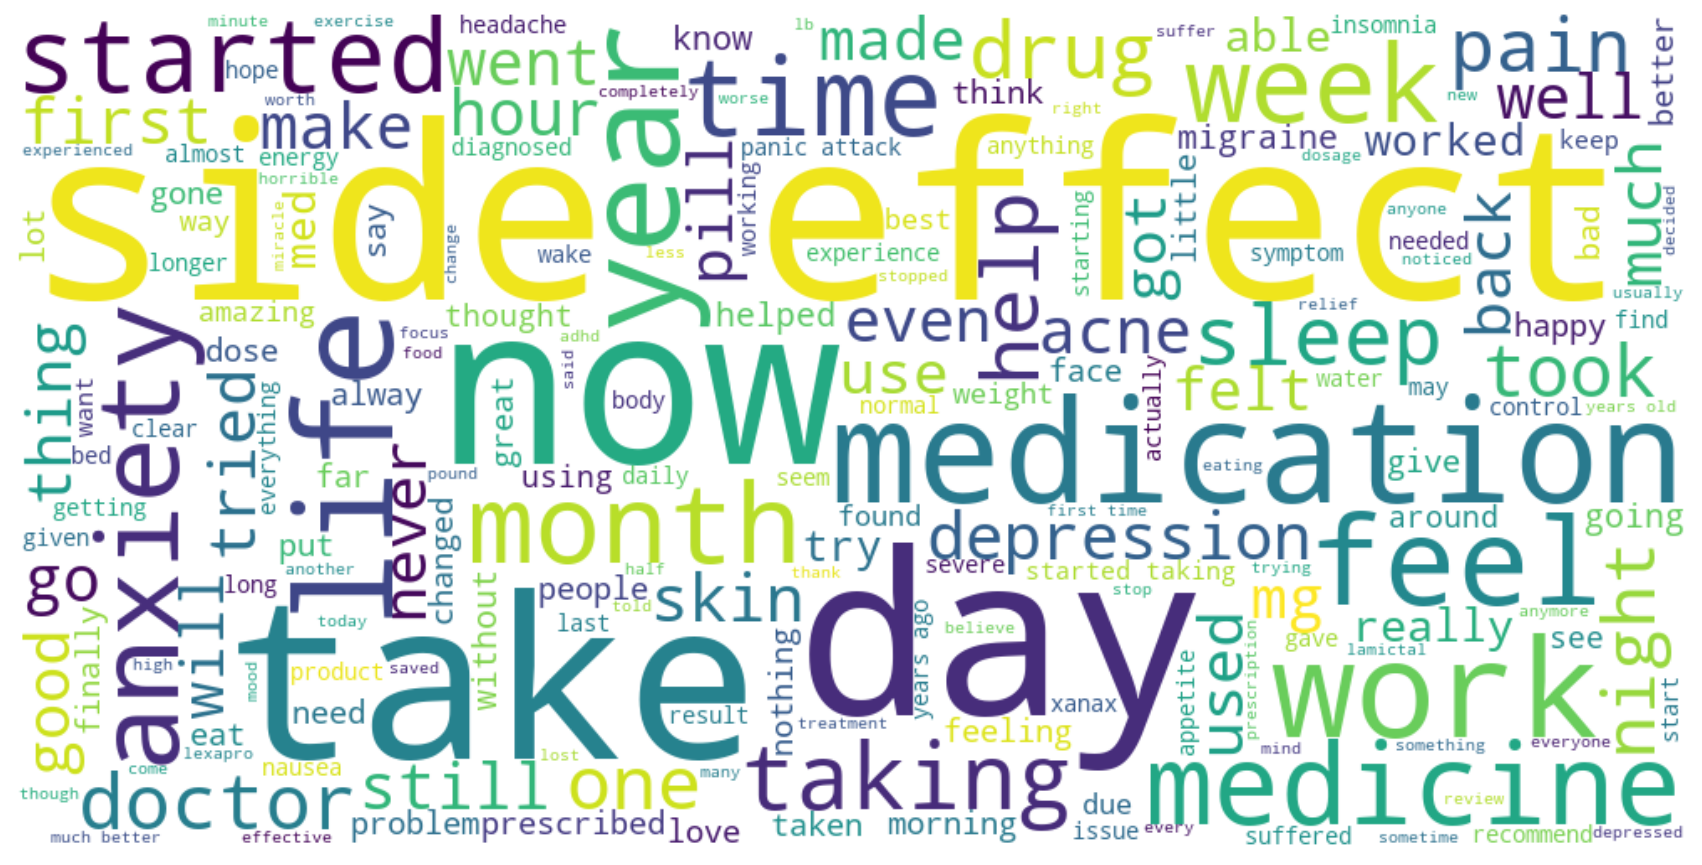

In [20]:
df_rate_ten = df.loc[df.Rating == 10.0, 'Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

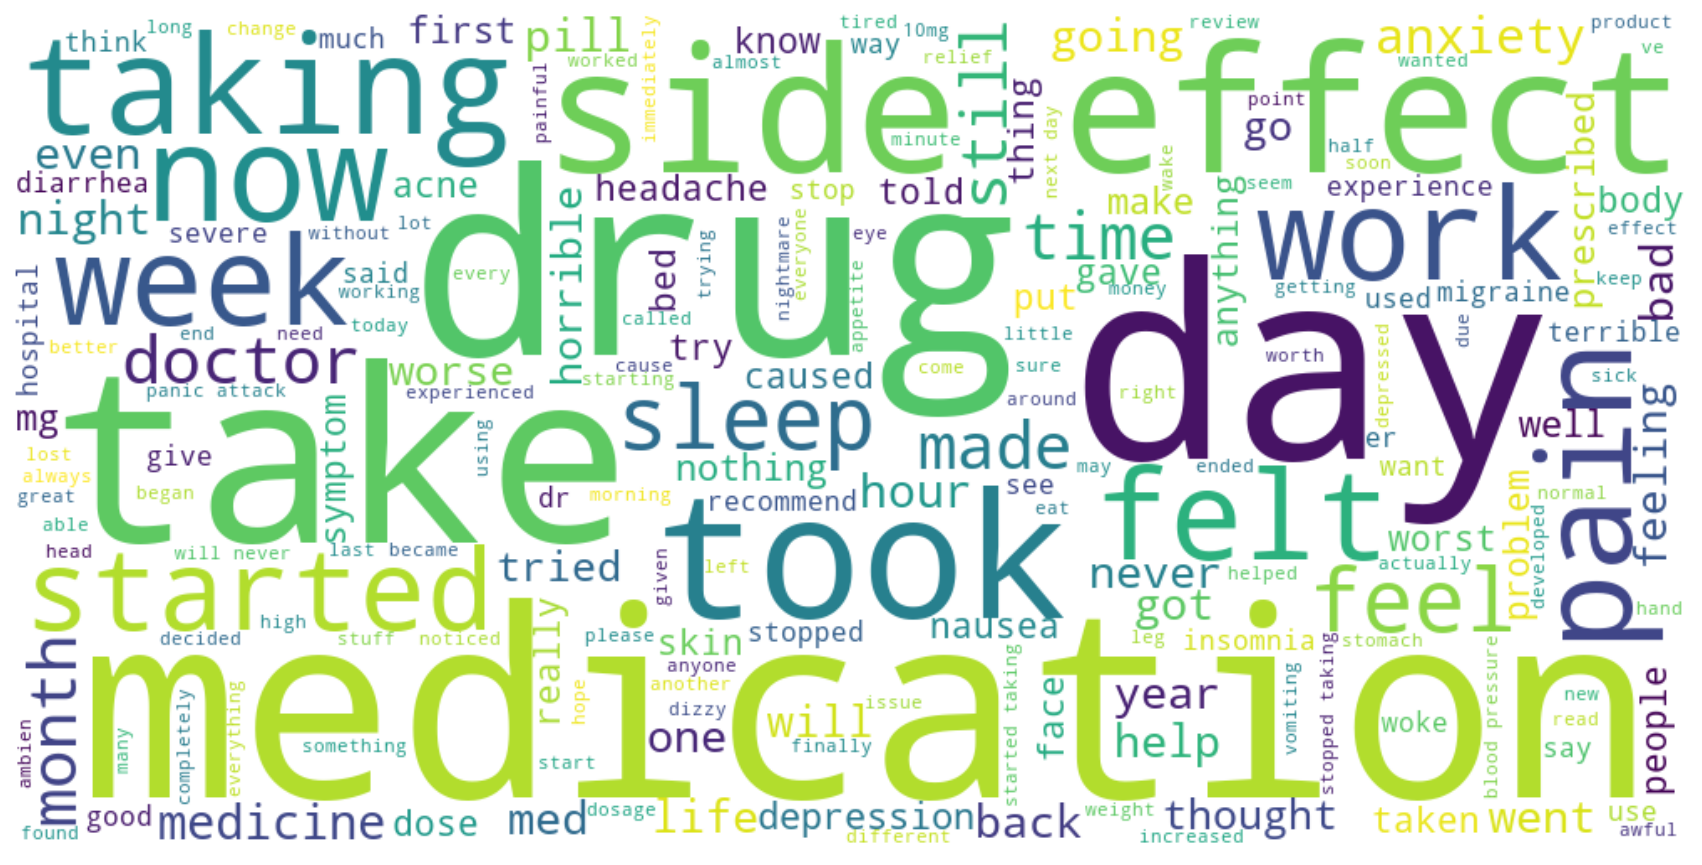

In [21]:
df_rate_ten = df.loc[df.Rating == 1.0, 'Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

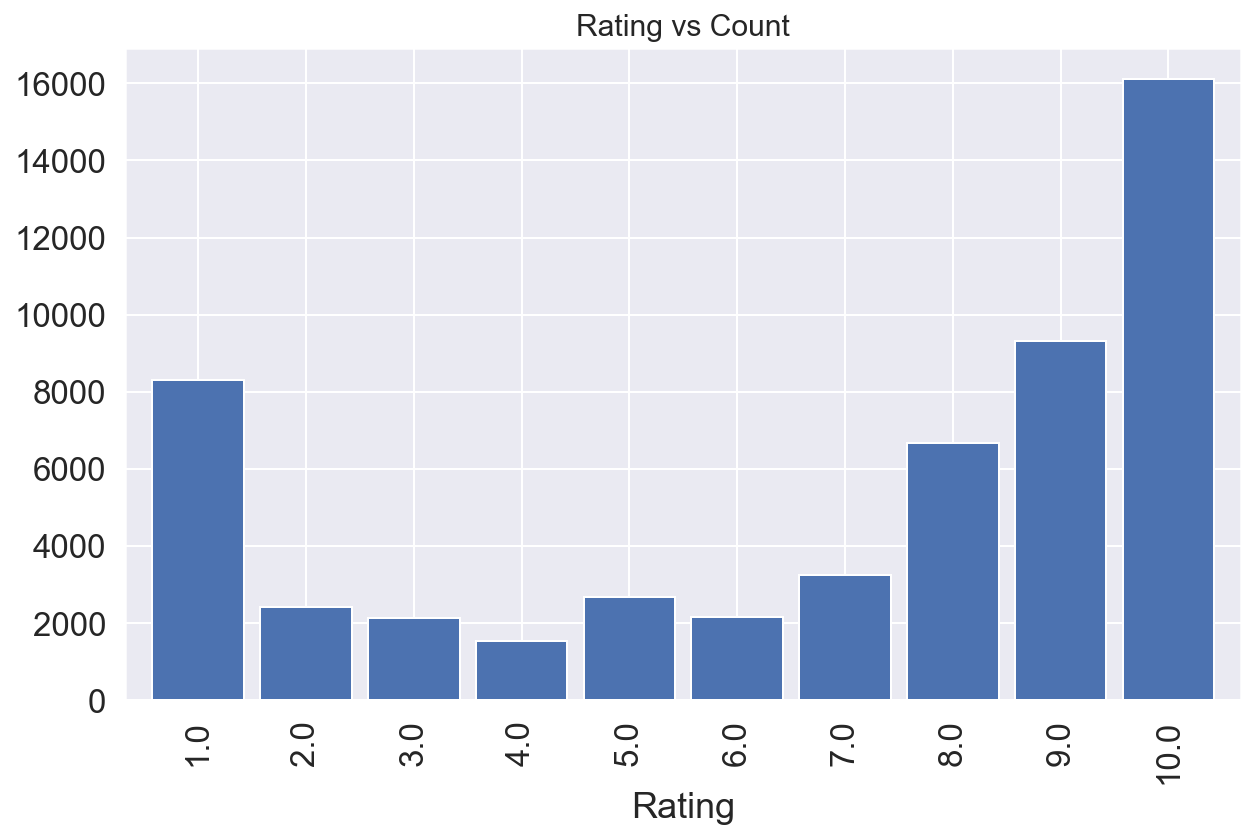

In [22]:
fig,ax = plt.subplots(figsize = (10,6))
df.groupby('Rating').size().plot(kind='bar', color='b', width=0.85)
ax.set_title("Rating vs Count", fontsize=15)
plt.show()

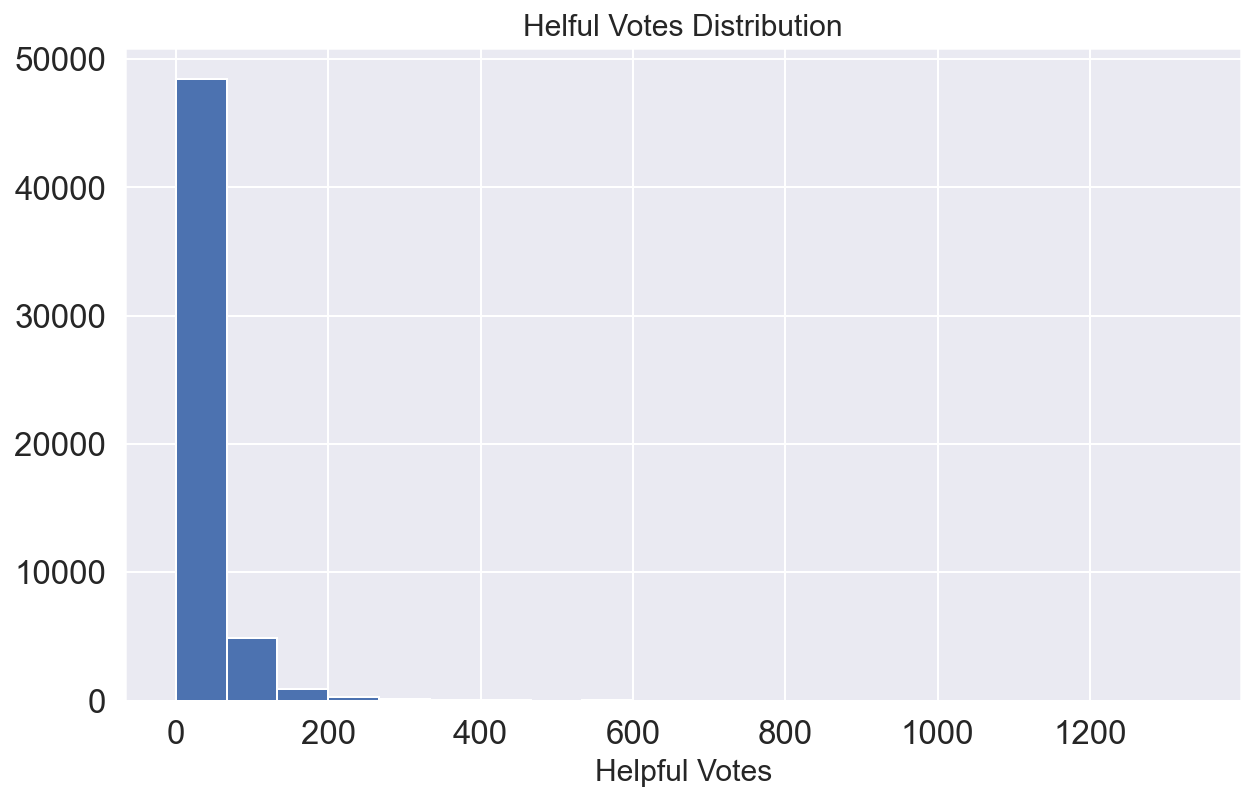

In [23]:
fig,ax = plt.subplots(figsize = (10,6))
ax.hist(df['Helpful'], bins = 20)
ax.set_xlabel('Helpful Votes',fontsize = 15)
ax.set_title("Helful Votes Distribution", fontsize=15)
plt.show()

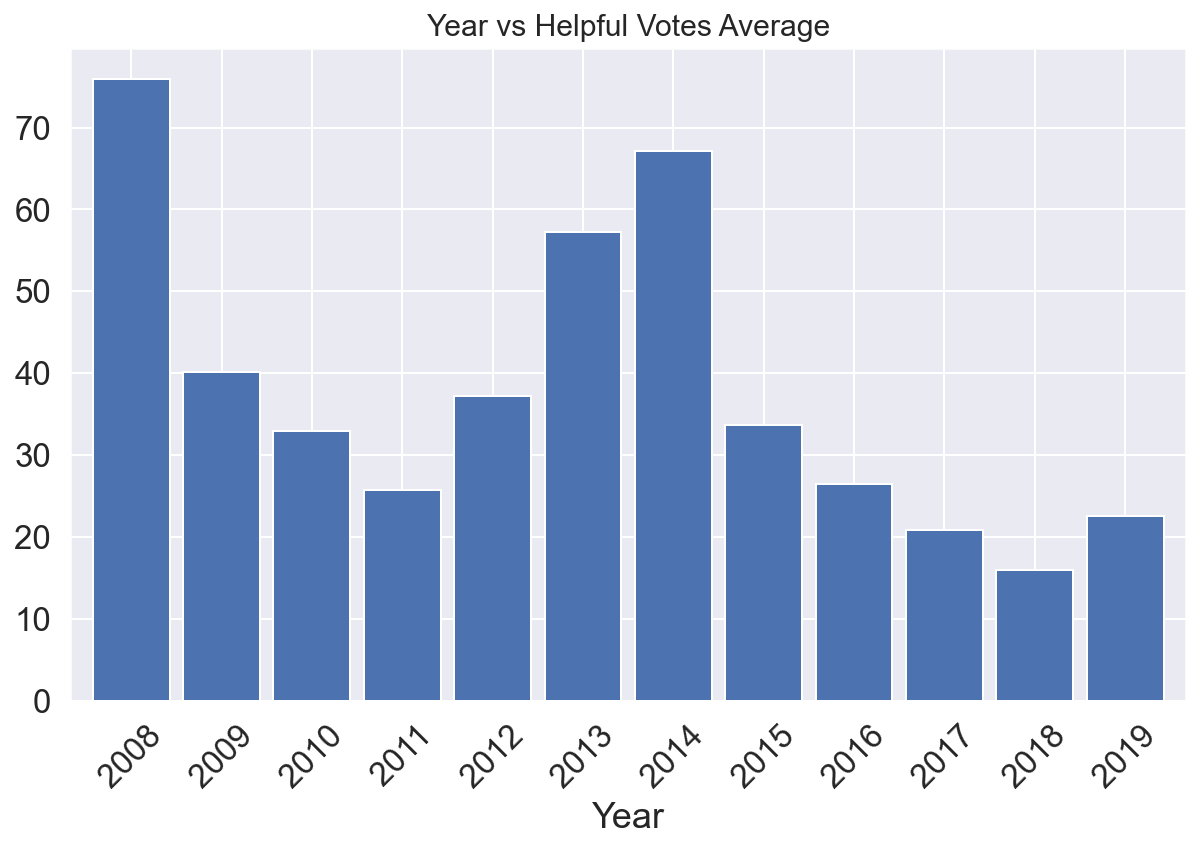

In [24]:
fig,ax = plt.subplots(figsize = (10,6))
df.groupby(['Year'])['Helpful'].mean().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=45)
ax.set_title("Year vs Helpful Votes Average", fontsize=15)
plt.show()

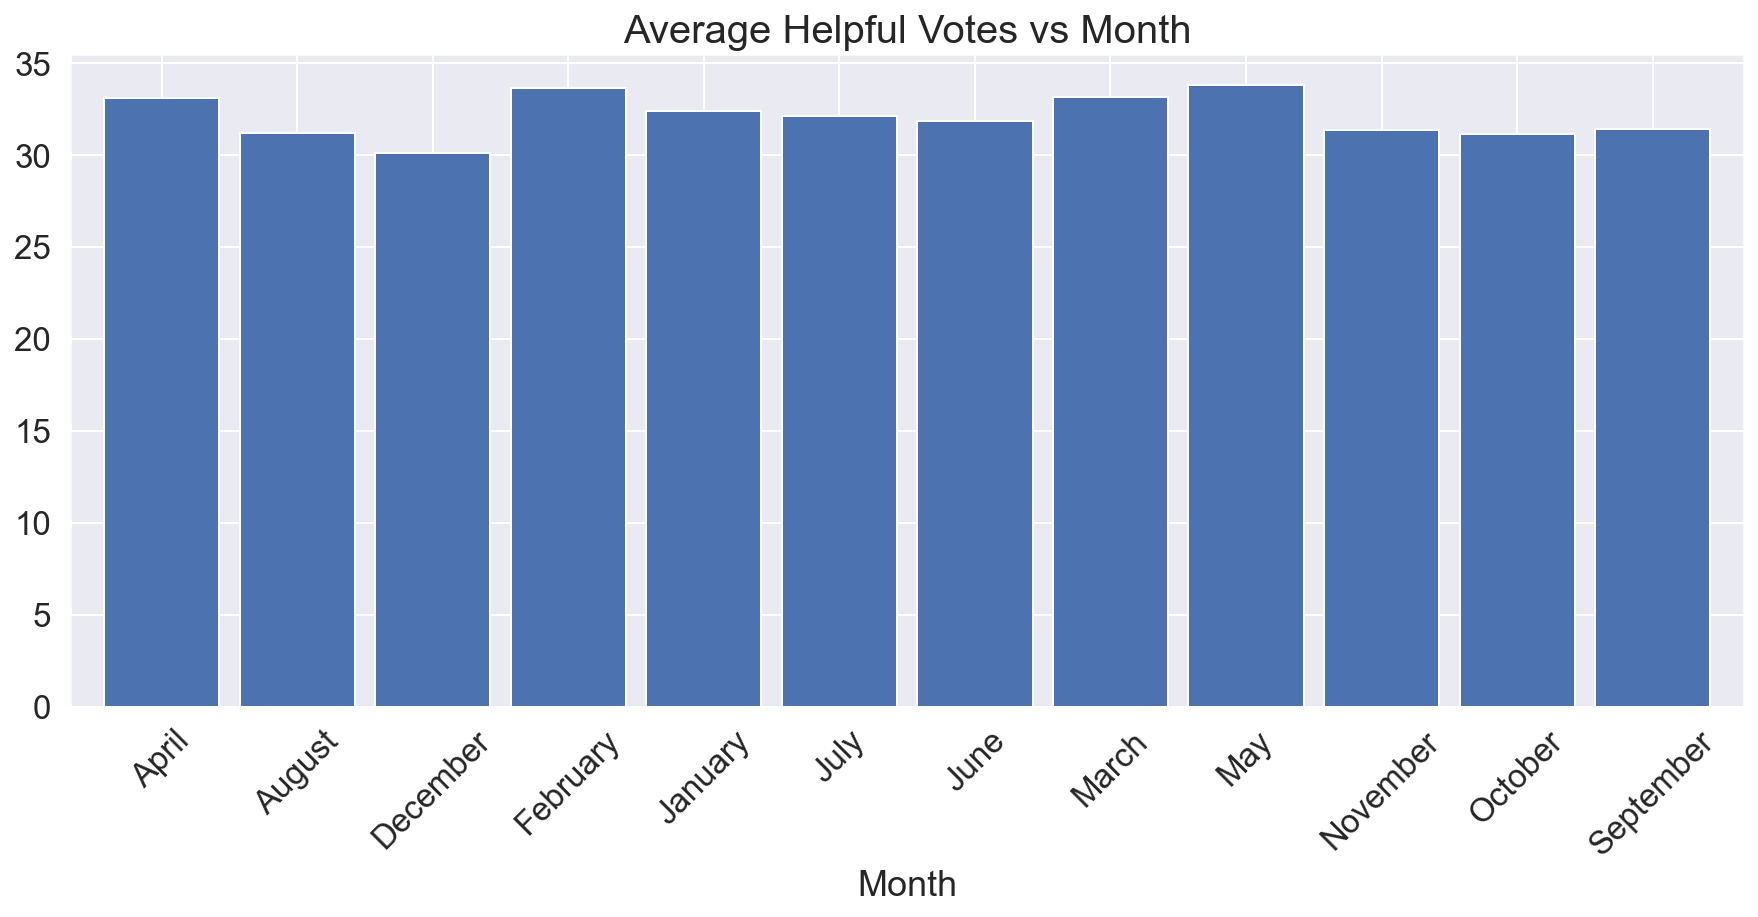

In [25]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby(['Month'])['Helpful'].mean().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=45)
ax.set_title('Average Helpful Votes vs Month', fontsize=20)
plt.show()

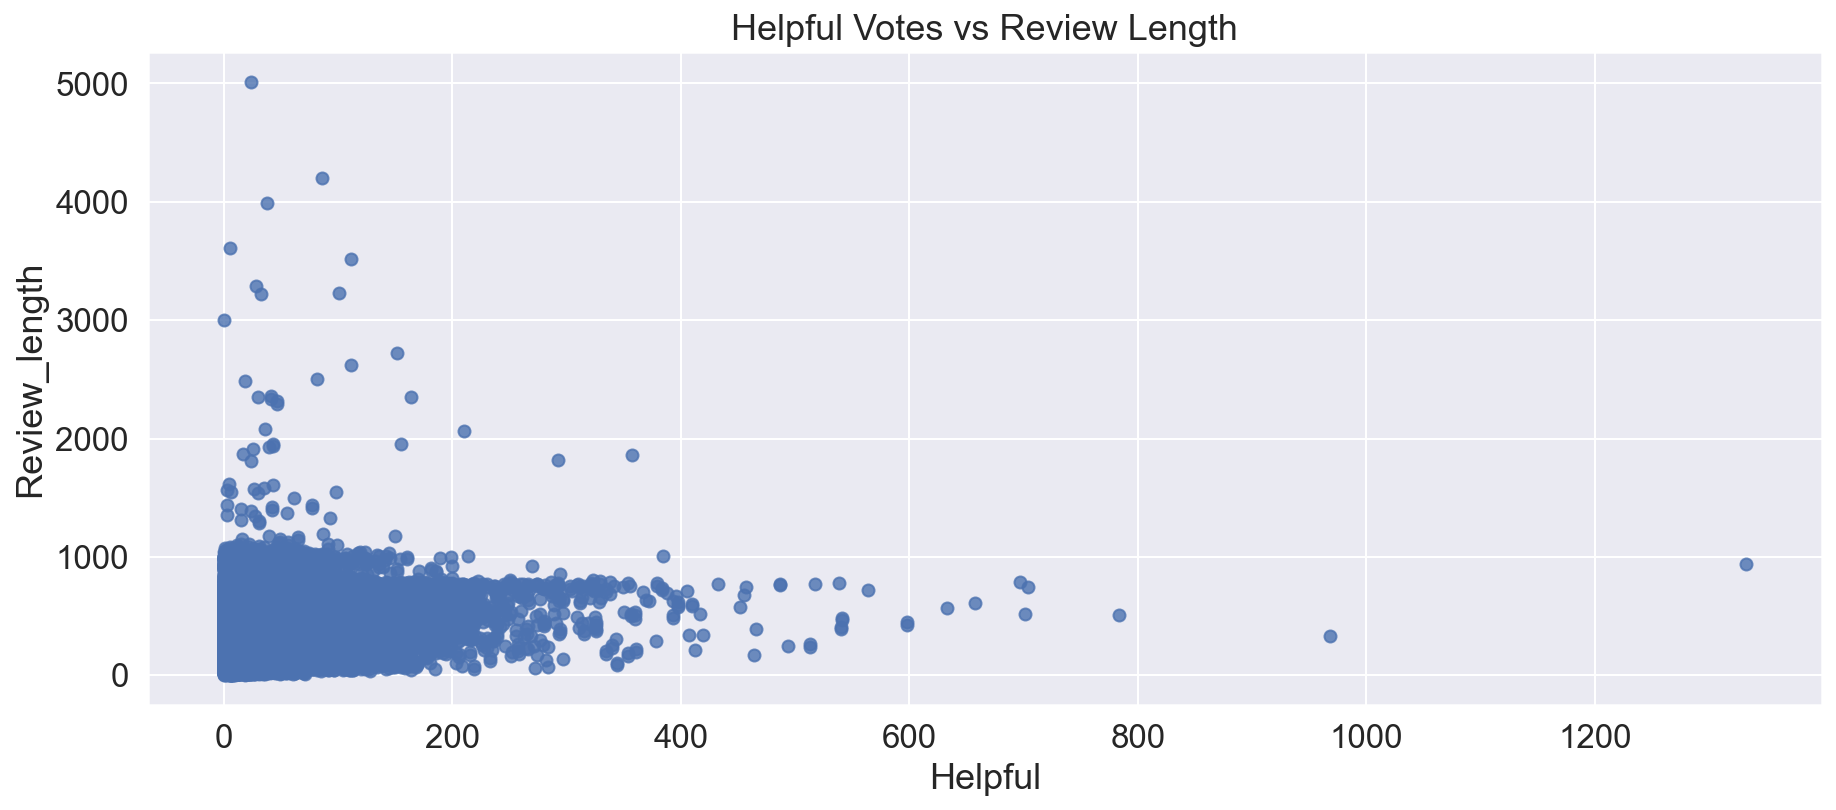

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.regplot('Helpful', 'Review_length', data=df,
            fit_reg=False, color='b', ax=ax)

ax.set_title('Helpful Votes vs Review Length')
plt.show()

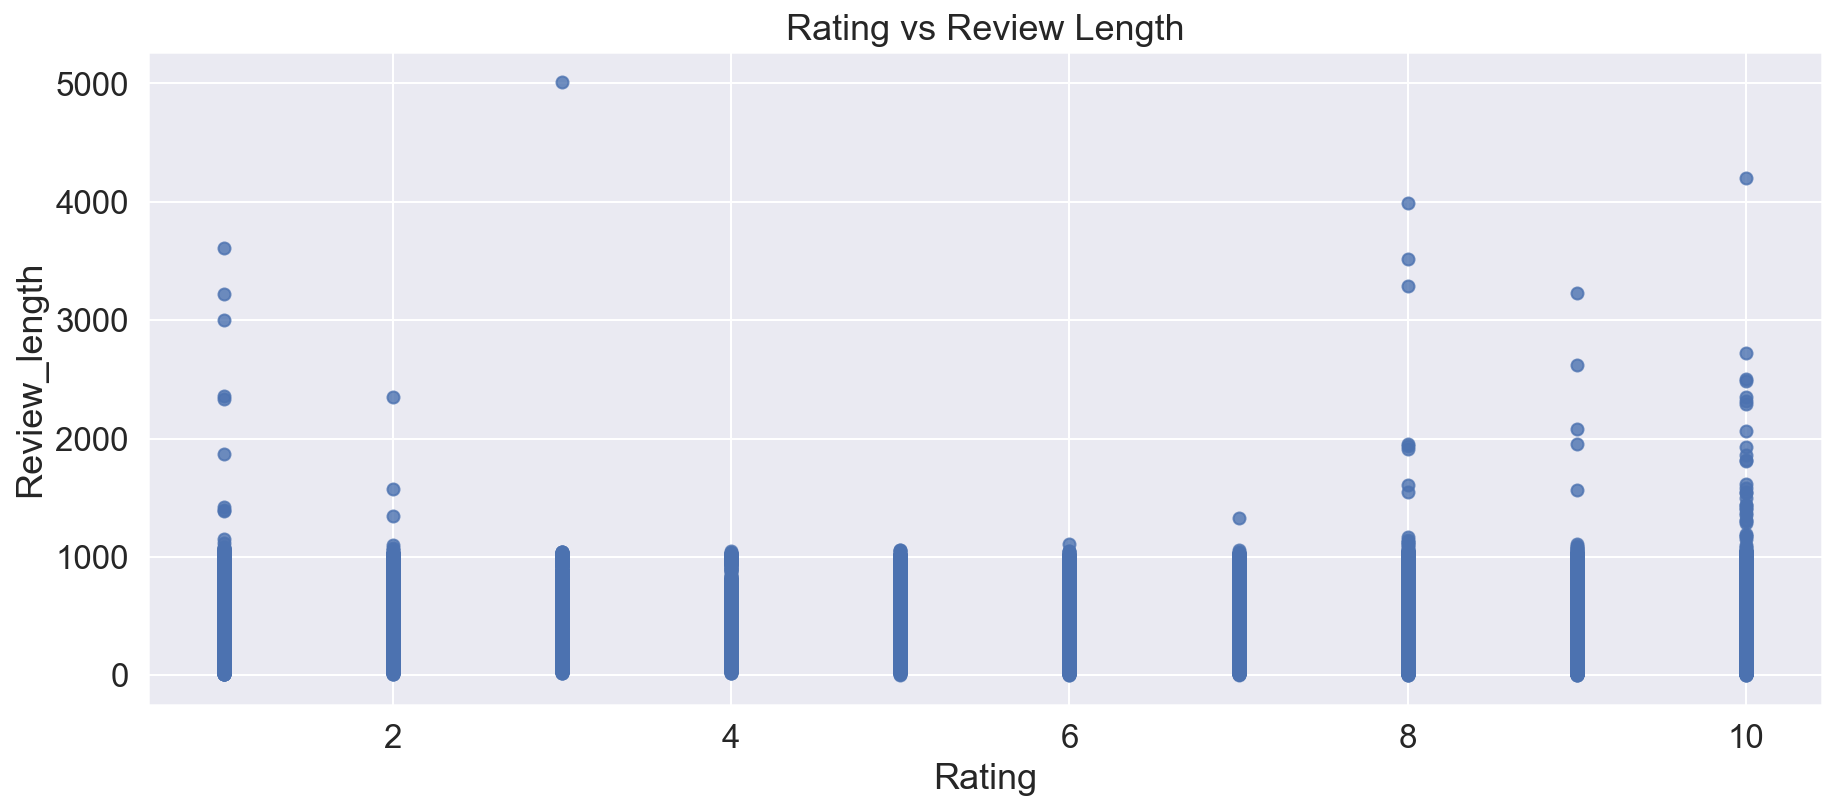

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.regplot('Rating', 'Review_length', data=df,
            fit_reg=False, color='b', ax=ax)

ax.set_title('Rating vs Review Length')
plt.show()

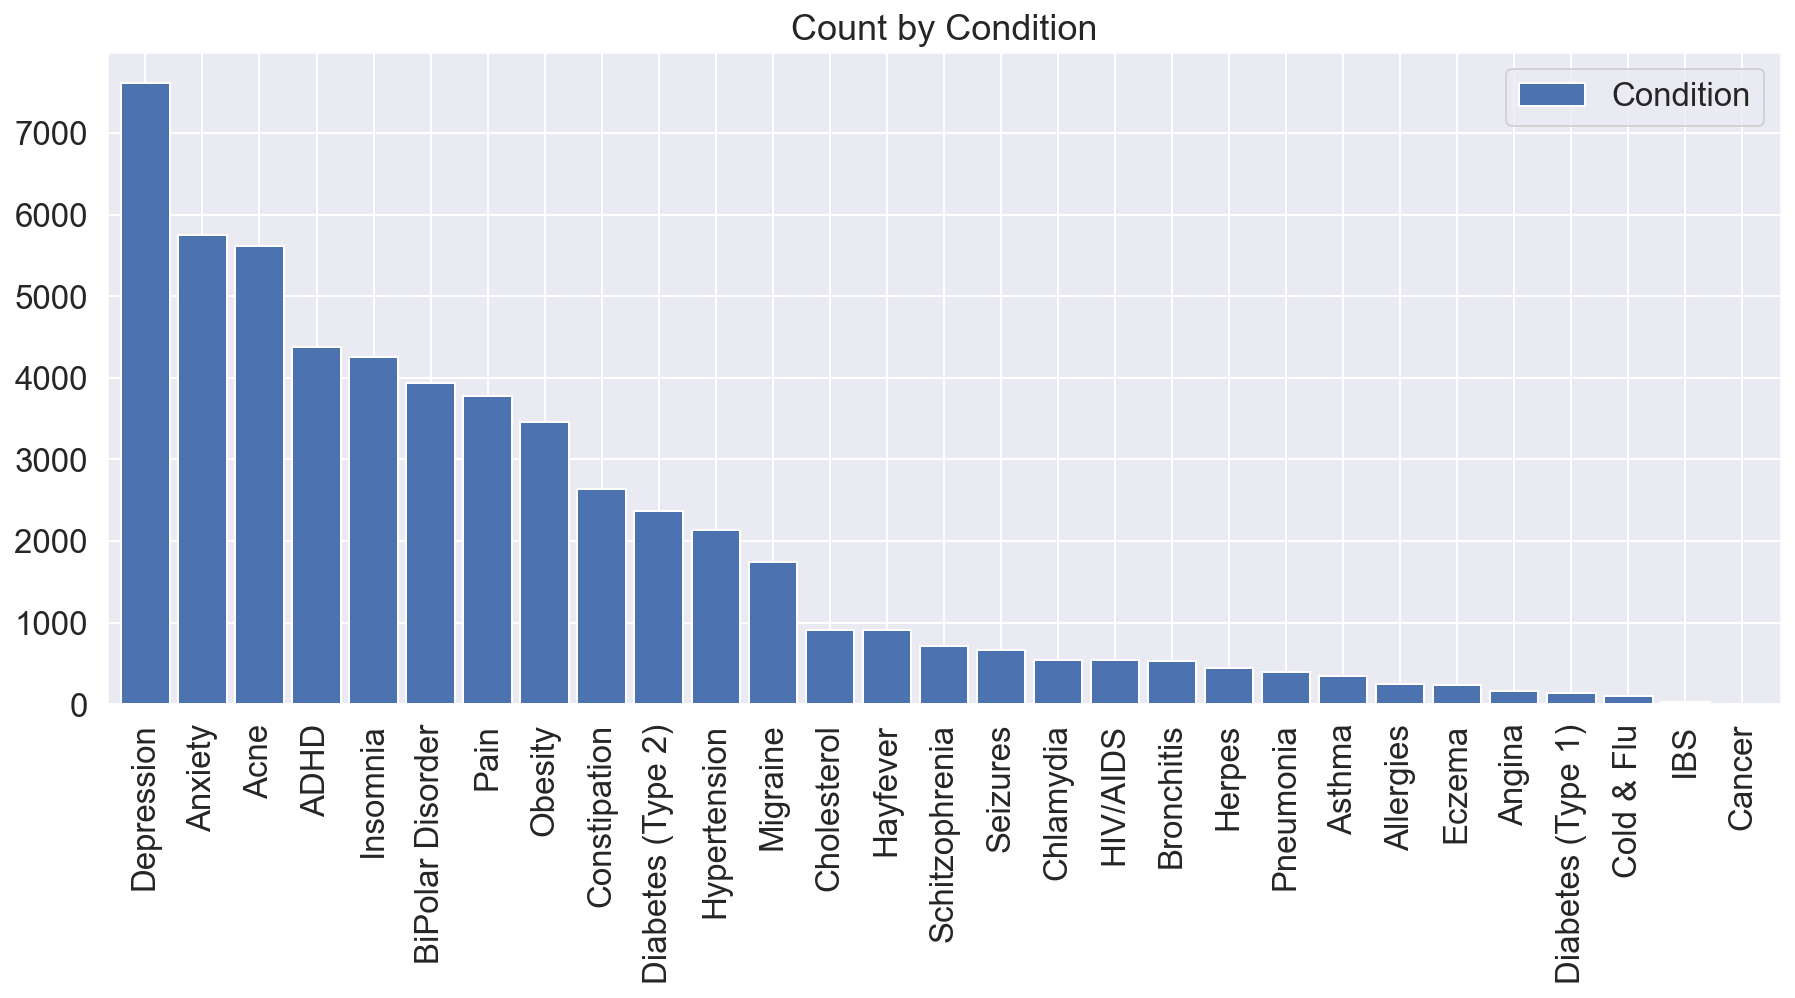

In [32]:
condition_df = pd.DataFrame(df.Condition.value_counts(ascending=False))
condition_df.plot(kind='bar', color='b', width=0.85, figsize = (15,6), title = 'Count by Condition')

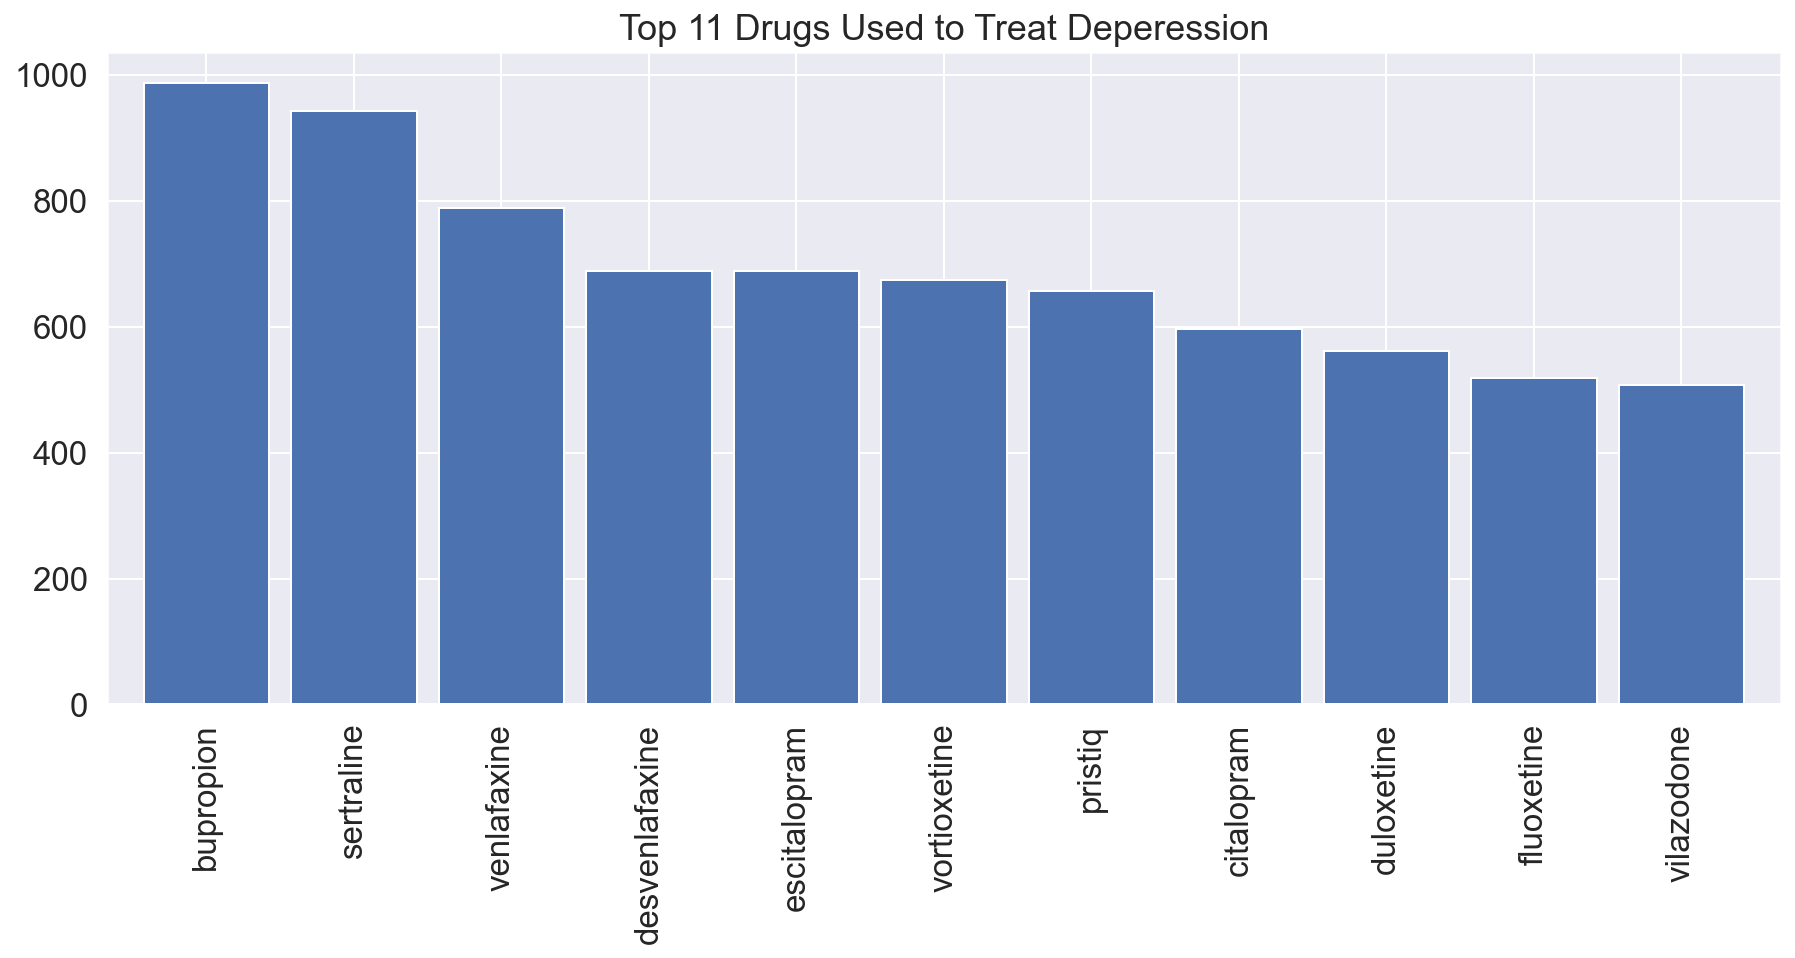

In [33]:
df_depression = df[df['Condition'] == 'Depression']['Drug'].value_counts()
df_depression.plot(kind='bar', color='b', width=0.85, figsize = (15,6), title = 'Top 11 Drugs Used to Treat Deperession')

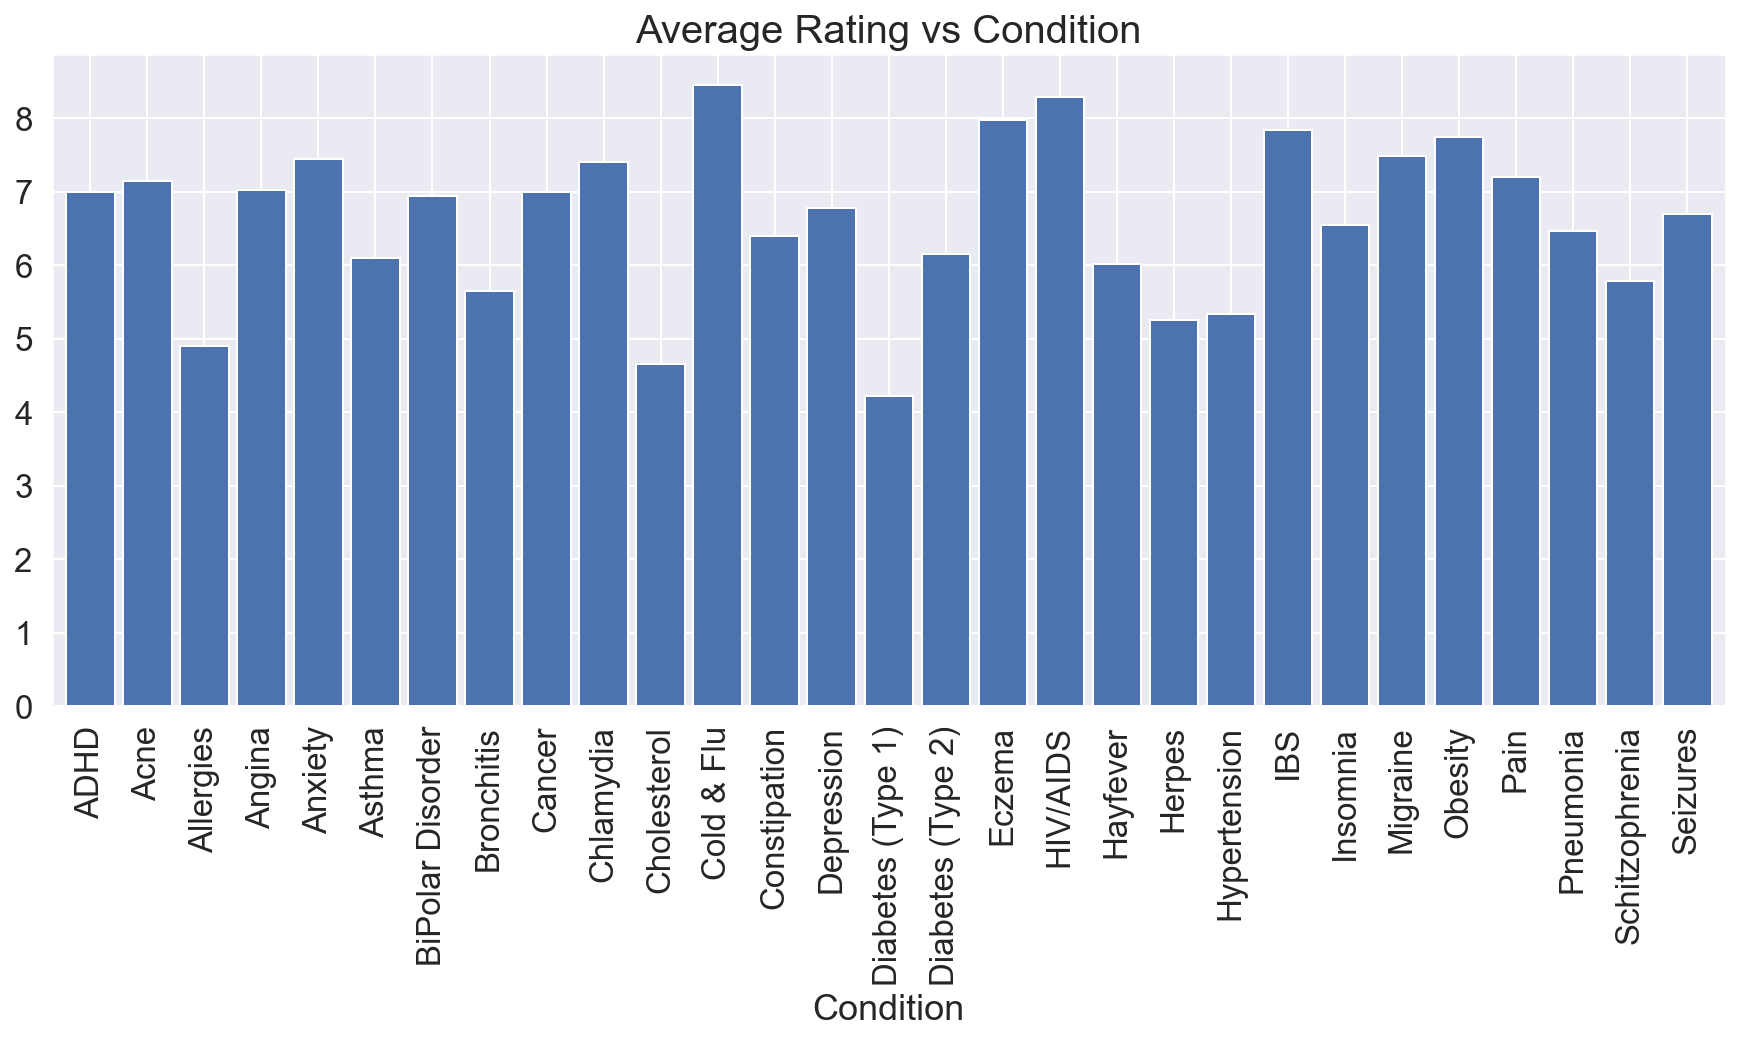

In [128]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby(['Condition'])['Rating'].mean().plot(kind='bar', color='b', width=0.85)
ax.set_title('Average Rating vs Condition', fontsize=20)
plt.xticks(rotation=90)
plt.show()

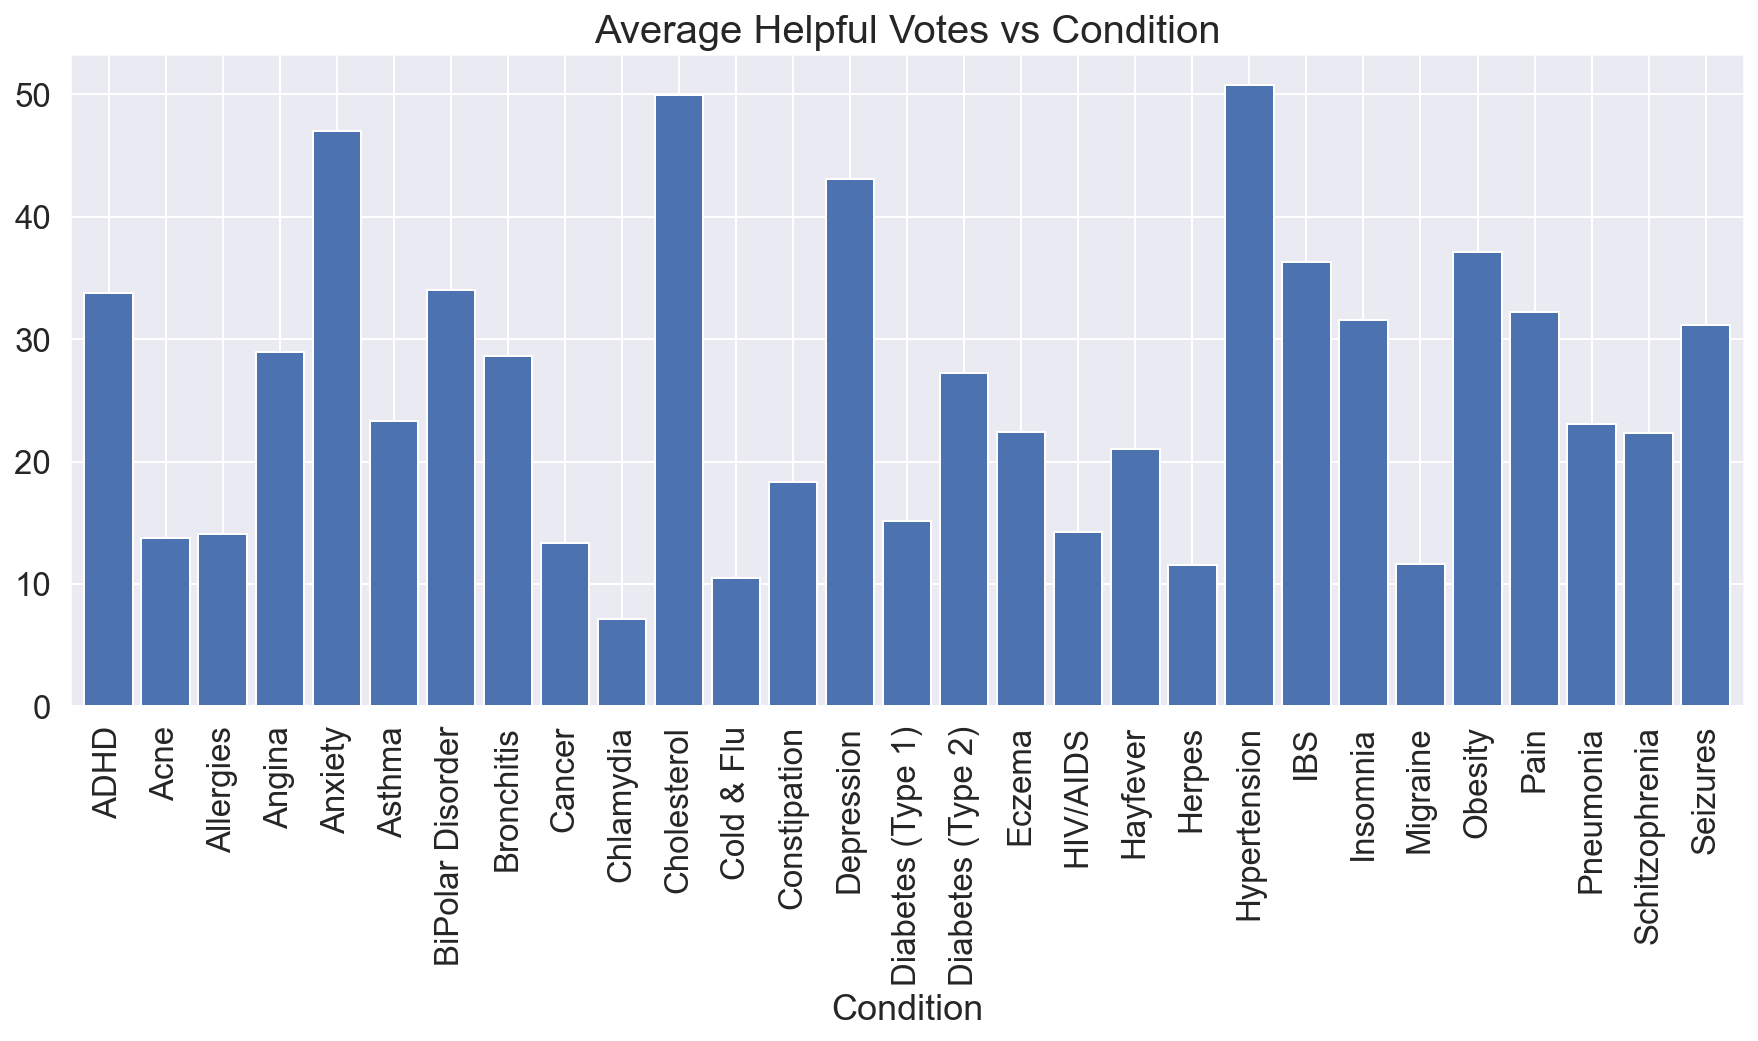

In [129]:
fig,ax = plt.subplots(figsize = (15,6))
df.groupby(['Condition'])['Helpful'].mean().plot(kind='bar', color='b', width=0.85)
plt.xticks(rotation=90)
ax.set_title('Average Helpful Votes vs Condition', fontsize=20)
plt.show()

In [130]:
df.corr()

Rating   Helpful  Major Interaction  \
Rating                1.000000  0.208037           0.030194   
Helpful               0.208037  1.000000           0.087674   
Major Interaction     0.030194  0.087674           1.000000   
Moderate Interaction -0.040663  0.111060           0.423241   
Minor Interaction     0.028888  0.026547           0.112761   
Year                 -0.227609 -0.244346          -0.122930   
off-label            -0.036755 -0.142695          -0.053223   
Review_length         0.054062  0.078710          -0.002789   

                      Moderate Interaction  Minor Interaction      Year  \
Rating                           -0.040663           0.028888 -0.227609   
Helpful                           0.111060           0.026547 -0.244346   
Major Interaction                 0.423241           0.112761 -0.122930   
Moderate Interaction              1.000000           0.236820 -0.030526   
Minor Interaction                 0.236820           1.000000  0.007547   
Year                             -0.030526           0.007547  1.000000   
off-label                         0.039378           0.054341  0.183683   
Review_length                    -0.045691          -0.016460  0.197201   

                      off-label  Review_length  
Rating                -0.036755       0.054062  
Helpful               -0.142695       0.078710  
Major Interaction     -0.053223      -0.002789  
Moderate Interaction   0.039378      -0.045691  
Minor Interaction      0.054341      -0.016460  
Year                   0.183683       0.197201  
off-label              1.000000      -0.022260  
Review_length         -0.022260       1.000000

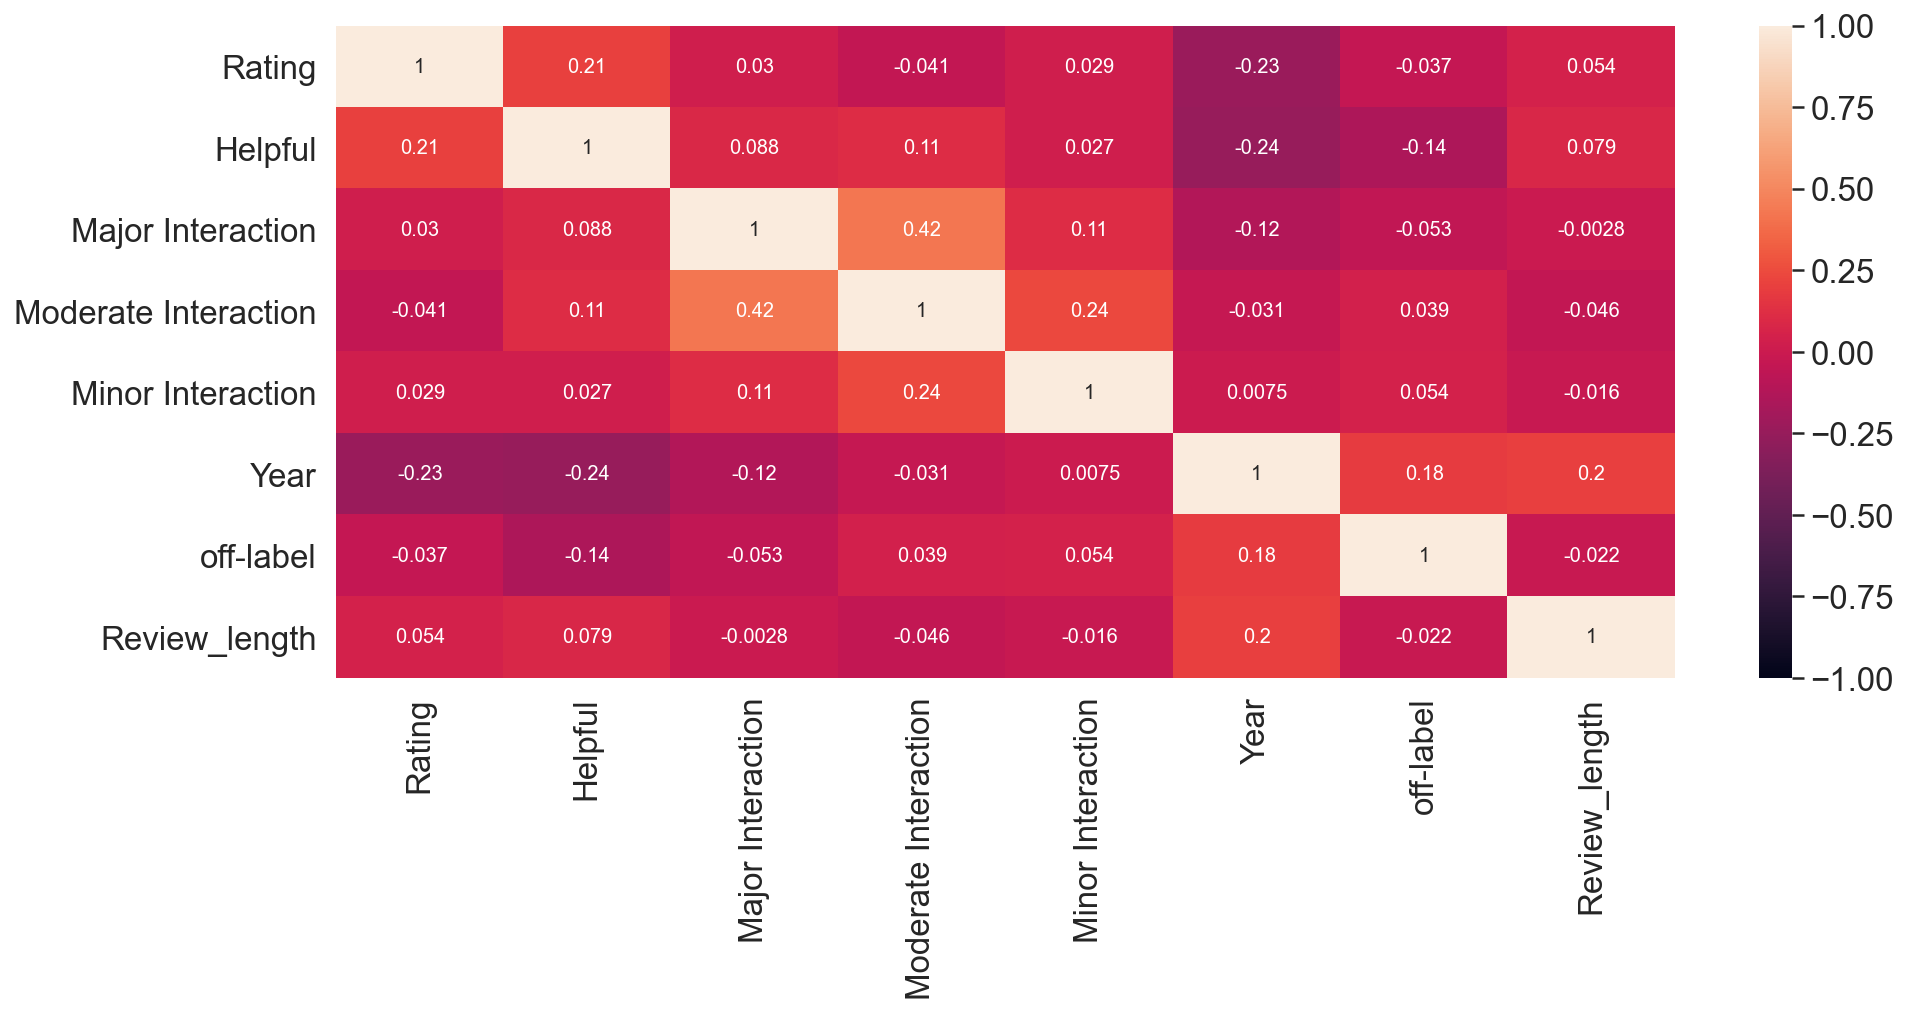

In [131]:
fig,ax = plt.subplots(figsize = (15,6))
sns_heat = sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1);

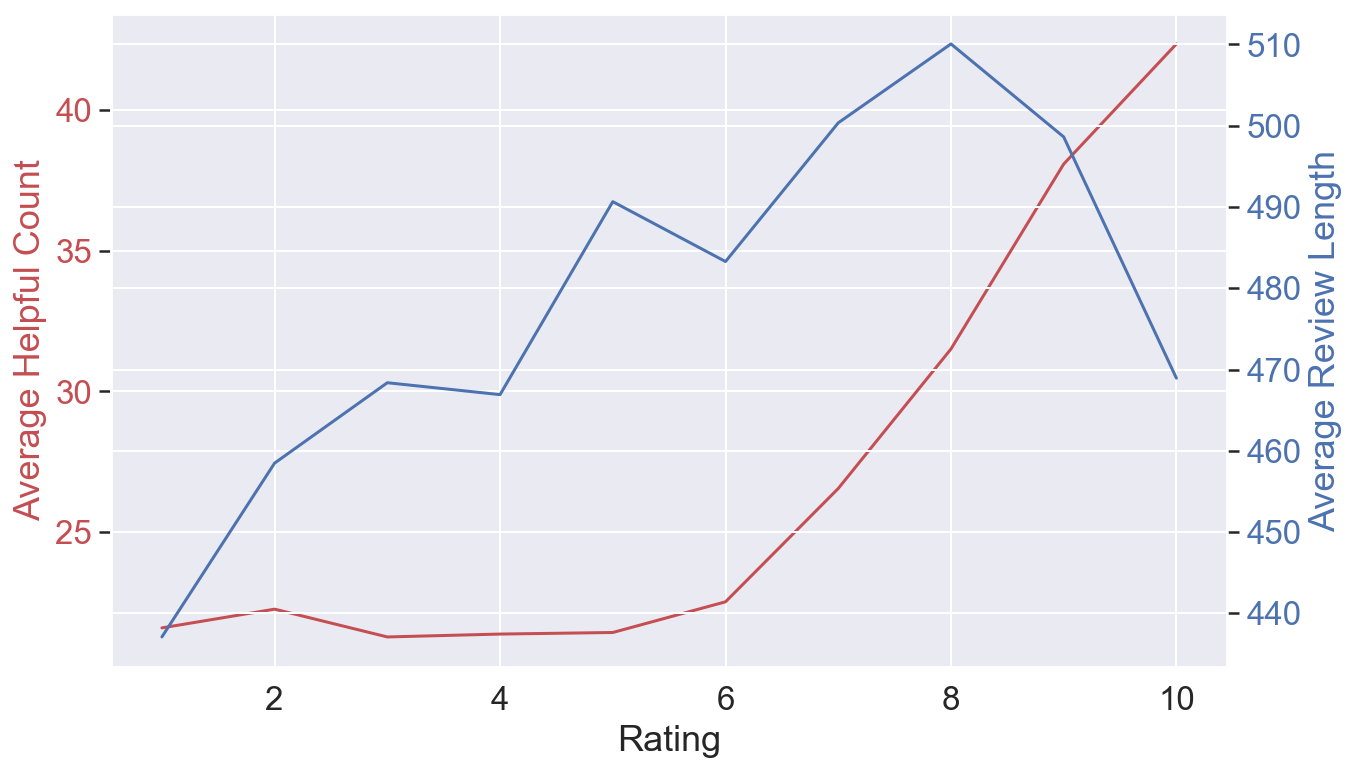

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Rating')
ax.set_ylabel('Average Helpful Count', color='r')
ax.plot(df.groupby('Rating').Helpful.mean(), color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Average Helpful Count vs. Rating\n Average Review Length vs. Rating')
ax2 = ax.twinx()  
ax2.set_ylabel('Average Review Length', color='b')  
ax2.plot(df.groupby('Rating').Review_length.mean(), color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.show()

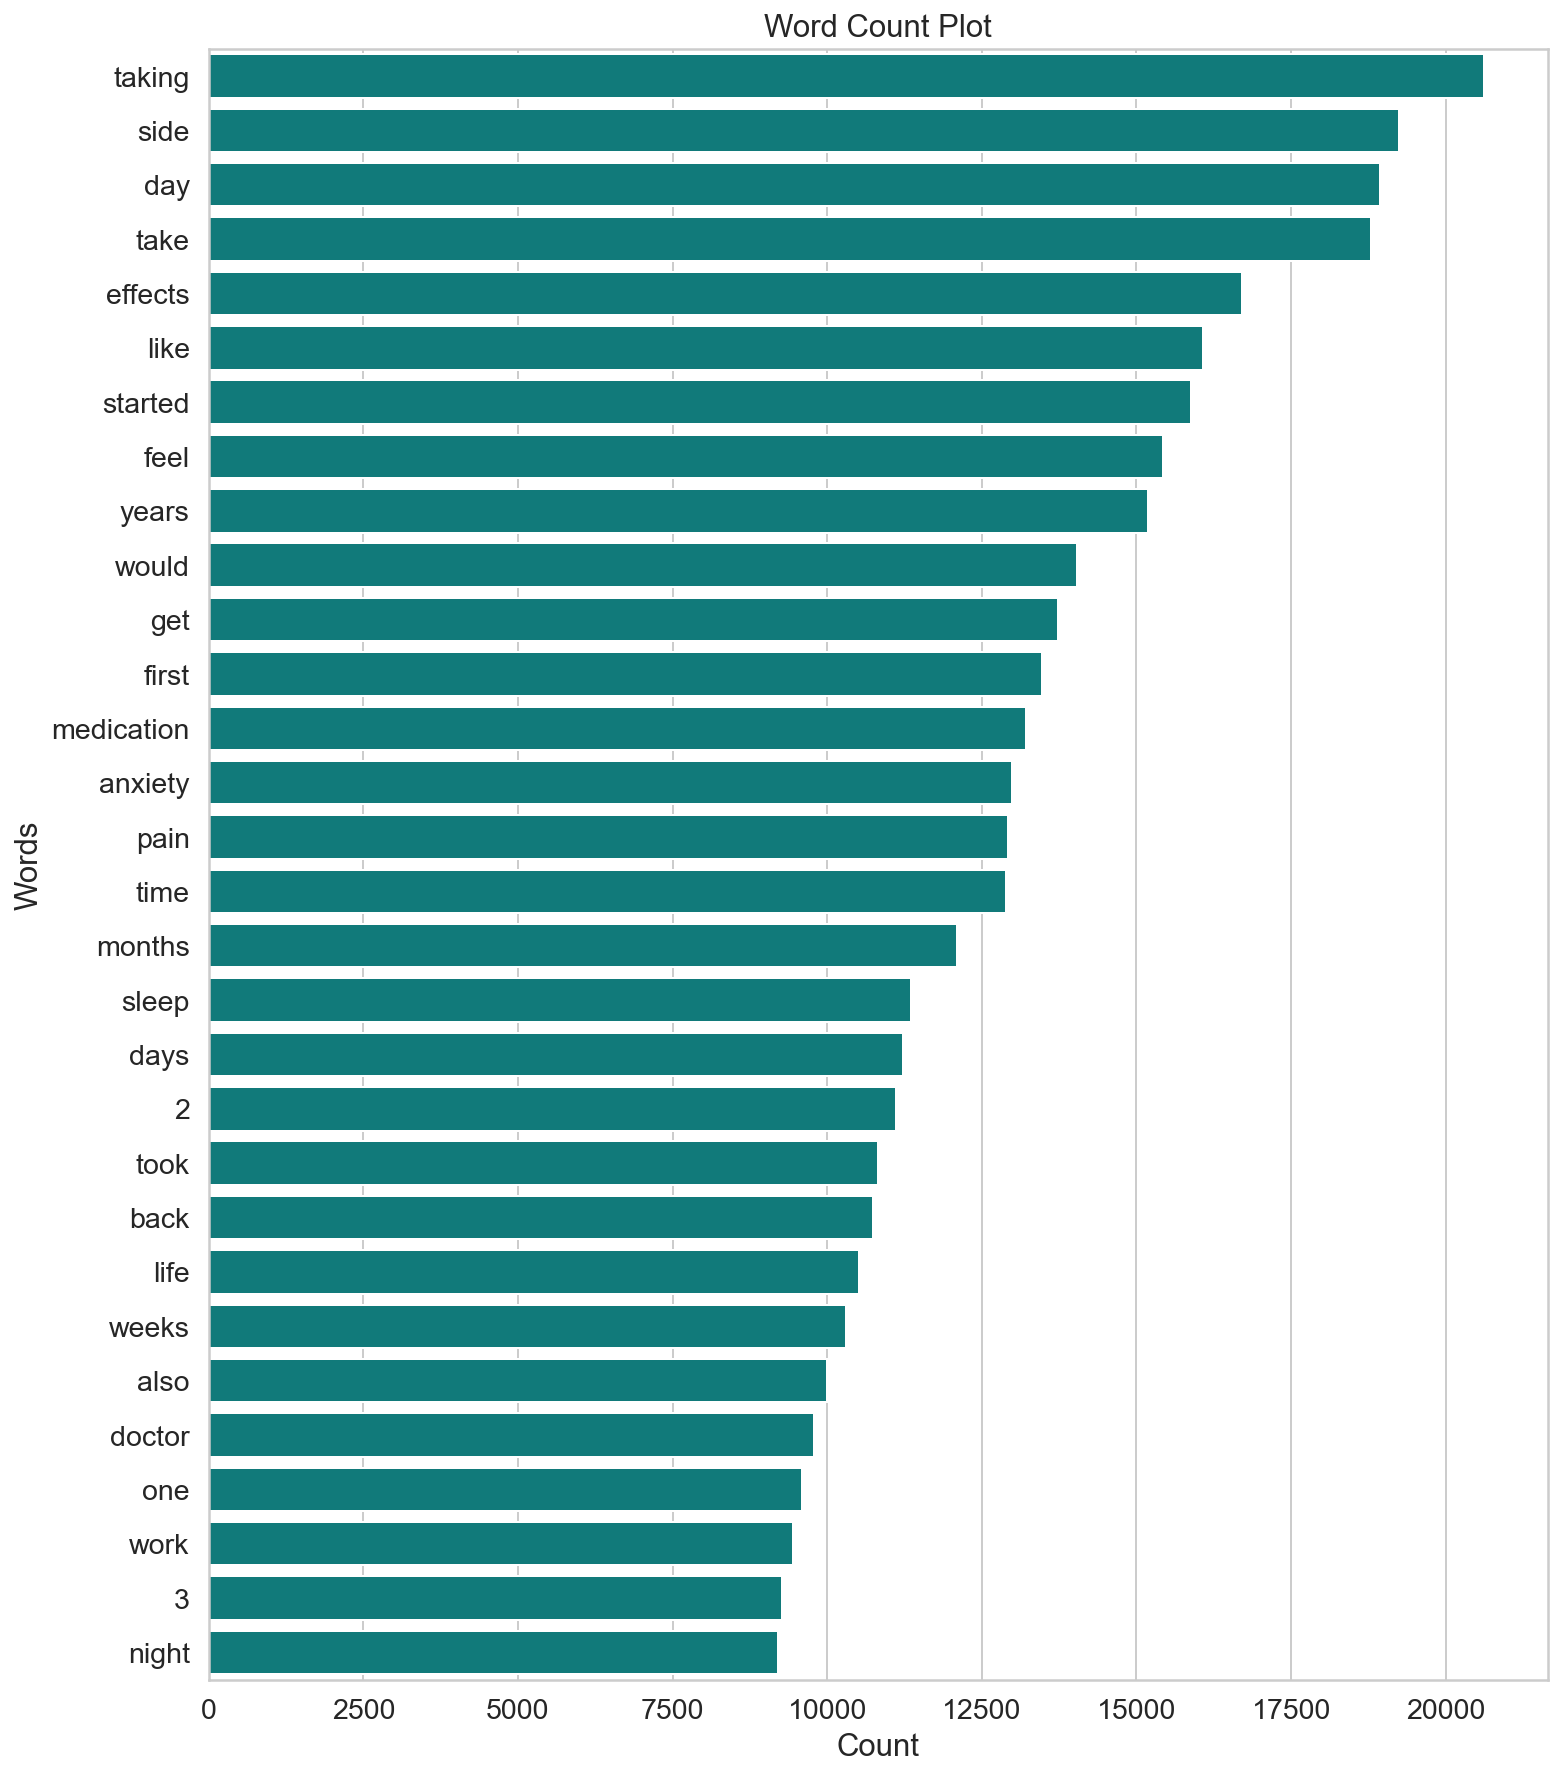

In [263]:
plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df2[1], y = df2[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");
